In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
scaler = StandardScaler() 
import matplotlib.pyplot as plt

In [2]:
def preprocess(df):
    df.isnull().sum()
    imputer= SimpleImputer(missing_values =np.nan, strategy='mean')
    new_columns = df.columns[0:]
    df[new_columns] = scaler.fit_transform(df[new_columns]) 
    return df

In [3]:

columns_to_read = ['Output1', 'Output2', 'Output3', 'Output4']
df = pd.read_csv('0.csv', usecols=columns_to_read)

print(df.head())

   Output1  Output2  Output3  Output4
0   346633   641184   967388   766141
1   346601   641089   967336   766075
2   346579   641075   967236   766038
3   346613   641203   967284   766120
4   346657   641295   967412   766200


In [4]:
df=preprocess(df)
df.head()

Output1   Output2   Output3   Output4
0 -1.771175 -1.731275 -1.729870 -1.681770
1 -1.812177 -1.768148 -1.748065 -1.732504
2 -1.840366 -1.773582 -1.783057 -1.760945
3 -1.796801 -1.723900 -1.766261 -1.697912
4 -1.740423 -1.688191 -1.721472 -1.636417

In [5]:
signal=df['Output1'] 
print(signal)

0      -1.771175
1      -1.812177
2      -1.840366
3      -1.796801
4      -1.740423
          ...   
1147    1.845981
1148    1.870326
1149    1.871607
1150    1.853669
1151    1.839574
Name: Output1, Length: 1152, dtype: float64


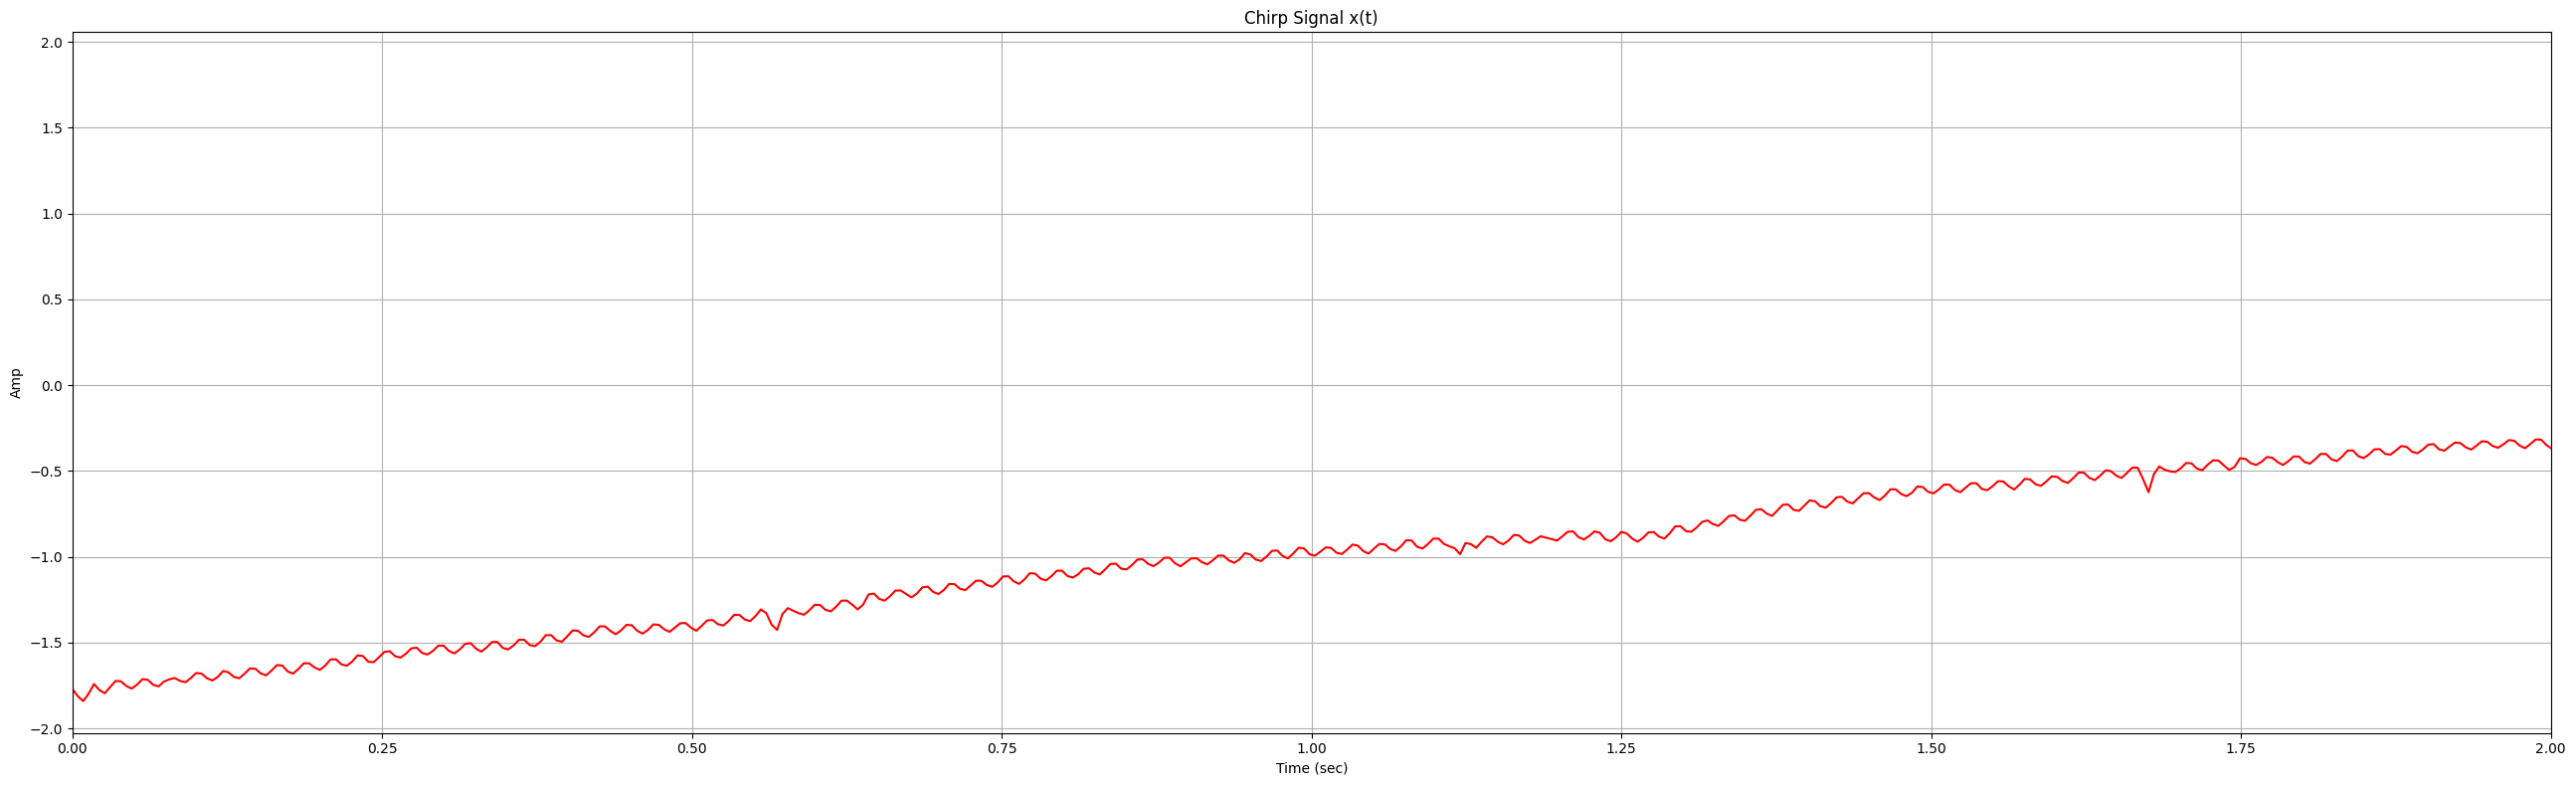

In [6]:
#plotting chirp signal- a signal that varies in frequency over time is called a chirp signal

T = 5.0  # sec
fs = len(signal)/T  # sampling freq in Hz
t = np.linspace(0, T, int(T * fs), endpoint=False)
f0 = 100 # Hz


plt.figure(figsize=(26, 8))
plt.plot(t, signal, 'r')
plt.xlabel('Time (sec)')
plt.ylabel('Amp')
plt.title('Chirp Signal x(t)')
plt.grid(True)
plt.xlim([0, 2])
plt.tight_layout()
plt.show()

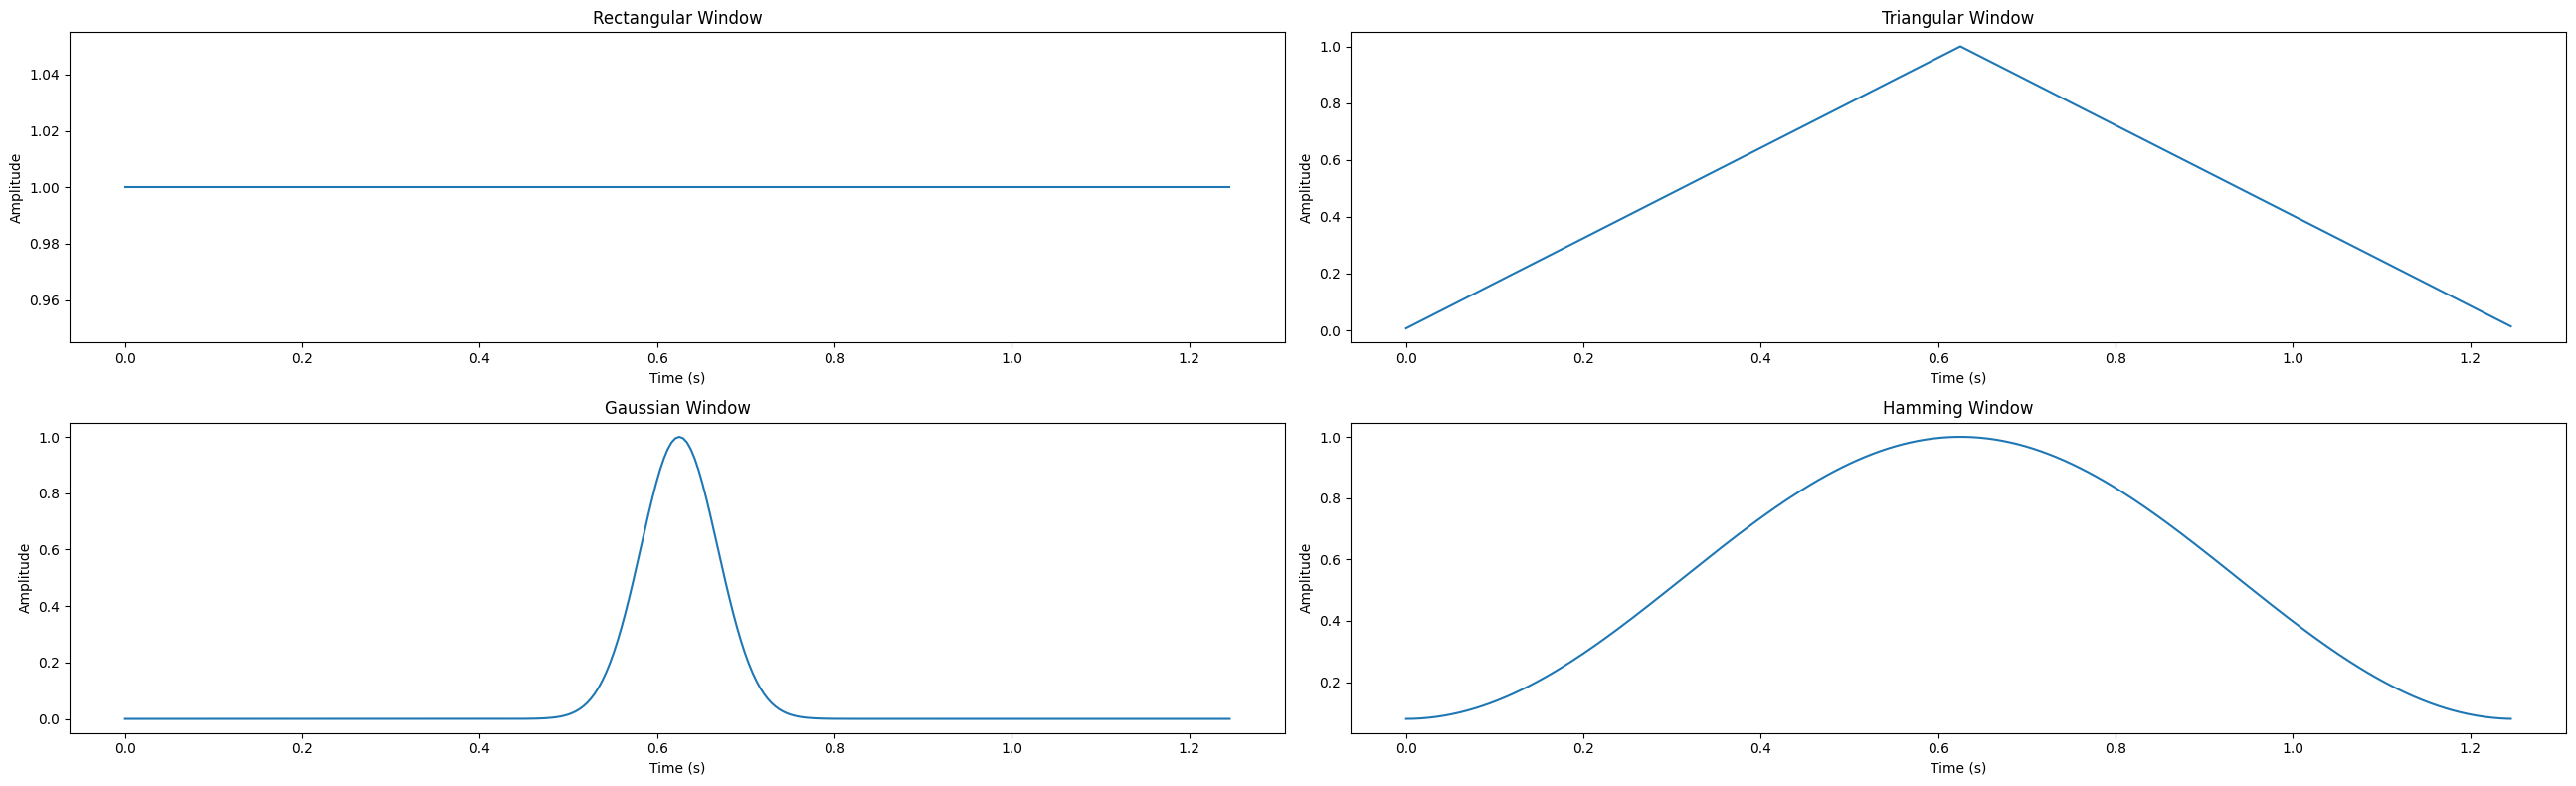

In [7]:
#windows-modify signals before fourier transforms(minimise spectral leakage)

from scipy.signal import get_window
L = int(( fs * T )//4)
std = 10 # for gaussian

rectangular_window = get_window('boxcar', L)
triangular_window = get_window('triang', L)
gauss_window = get_window(('gaussian', std), L)
hamming_window = get_window('hamming', L)

t = np.arange(0, L) / fs

plt.figure(figsize=(26, 8))
plt.subplot(2, 2, 1)
plt.plot(t, rectangular_window)
plt.title('Rectangular Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(t, triangular_window)
plt.title('Triangular Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.plot(t, gauss_window)
plt.title('Gaussian Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
plt.plot(t, hamming_window)
plt.title('Hamming Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

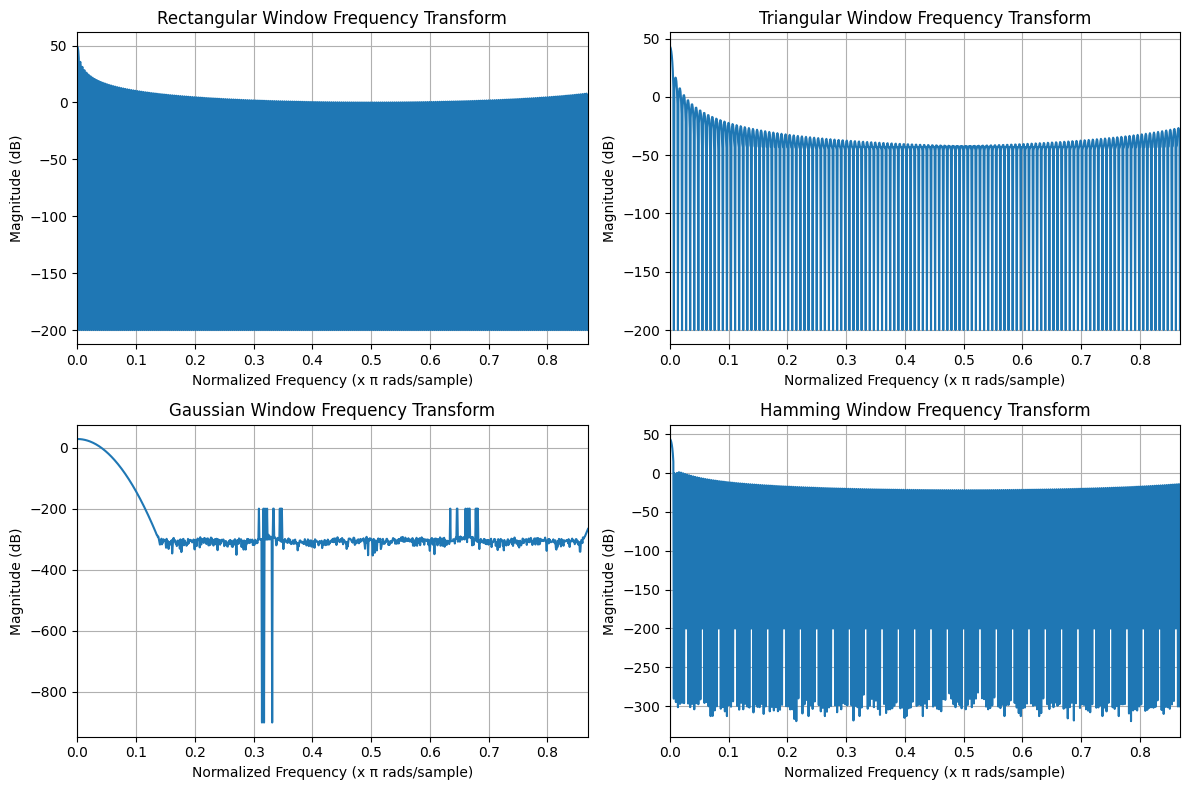

In [8]:
def normalized_frequency_axis(N):
    return np.arange(N) / N

N = len(signal)
plt.figure(figsize=(12, 8))
cnt = 1
names = ["Rectangular", "Triangular", "Gaussian", "Hamming"] 

for i in [rectangular_window, triangular_window, gauss_window, hamming_window]:
    X = np.fft.fft(i, N)
    X_mag = np.abs(X) 
    X_mag[X_mag == 0] = 1e-10 # to avoid log 0

    X_dB = 20 * np.log10(X_mag) #better visualize the amplitude differences across frequencies

    freq_axis = normalized_frequency_axis(N)

    plt.subplot(2, 2, cnt)
    plt.plot(freq_axis, X_dB)  #This tells us how strong each frequency component is in the signal. A higher amplitude means that frequency is more dominant
    plt.title('{} Window Frequency Transform'.format(names[cnt-1]))
    plt.xlabel('Normalized Frequency (x π rads/sample)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.xlim([0, freq_axis[1000]])
    cnt += 1

plt.tight_layout()
plt.show()


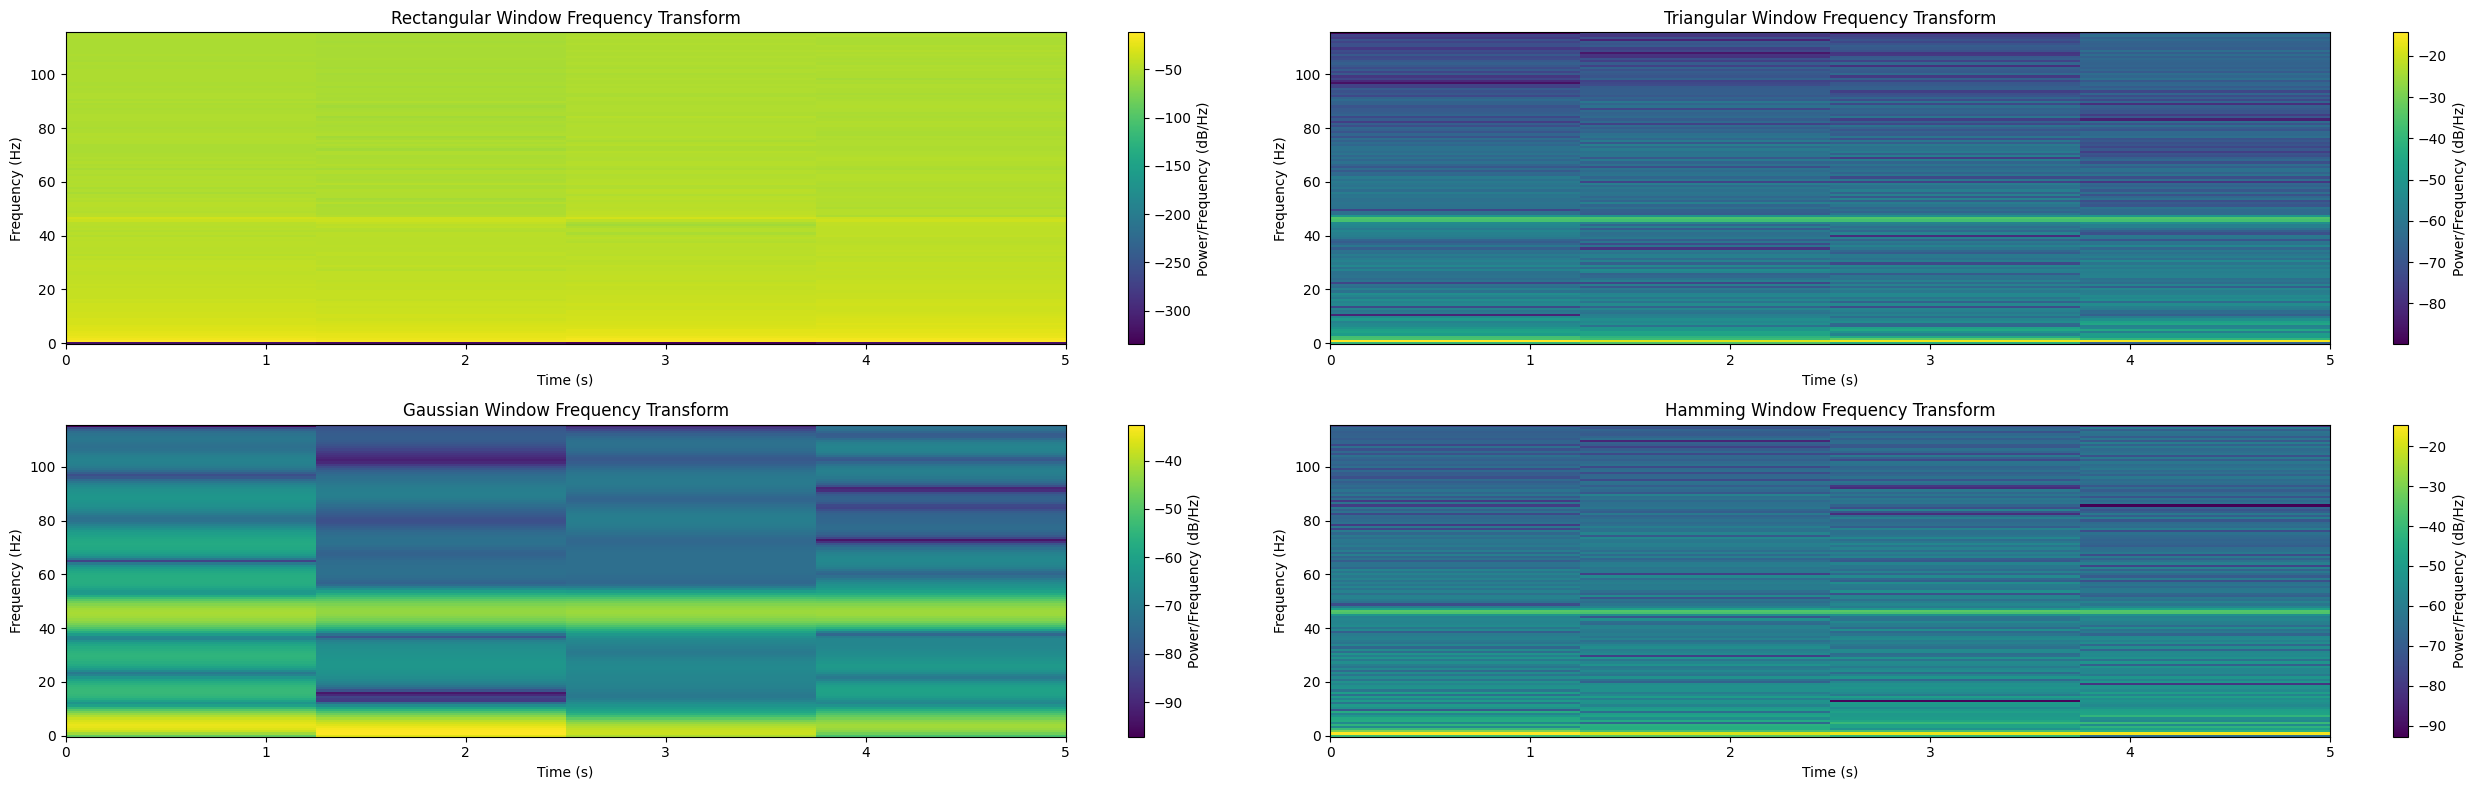

In [9]:
from scipy.signal import spectrogram
noverlap = 0
NFFT = L

plt.figure(figsize=(26, 8))
plt.subplot(2, 2, 1)
f, t, Sxx = spectrogram(signal, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Rectangular Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 2)
f, t, Sxx = spectrogram(signal, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Triangular Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 3)
f, t, Sxx = spectrogram(signal, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Gaussian Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 4)
f, t, Sxx = spectrogram(signal, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Hamming Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.tight_layout()
plt.show()

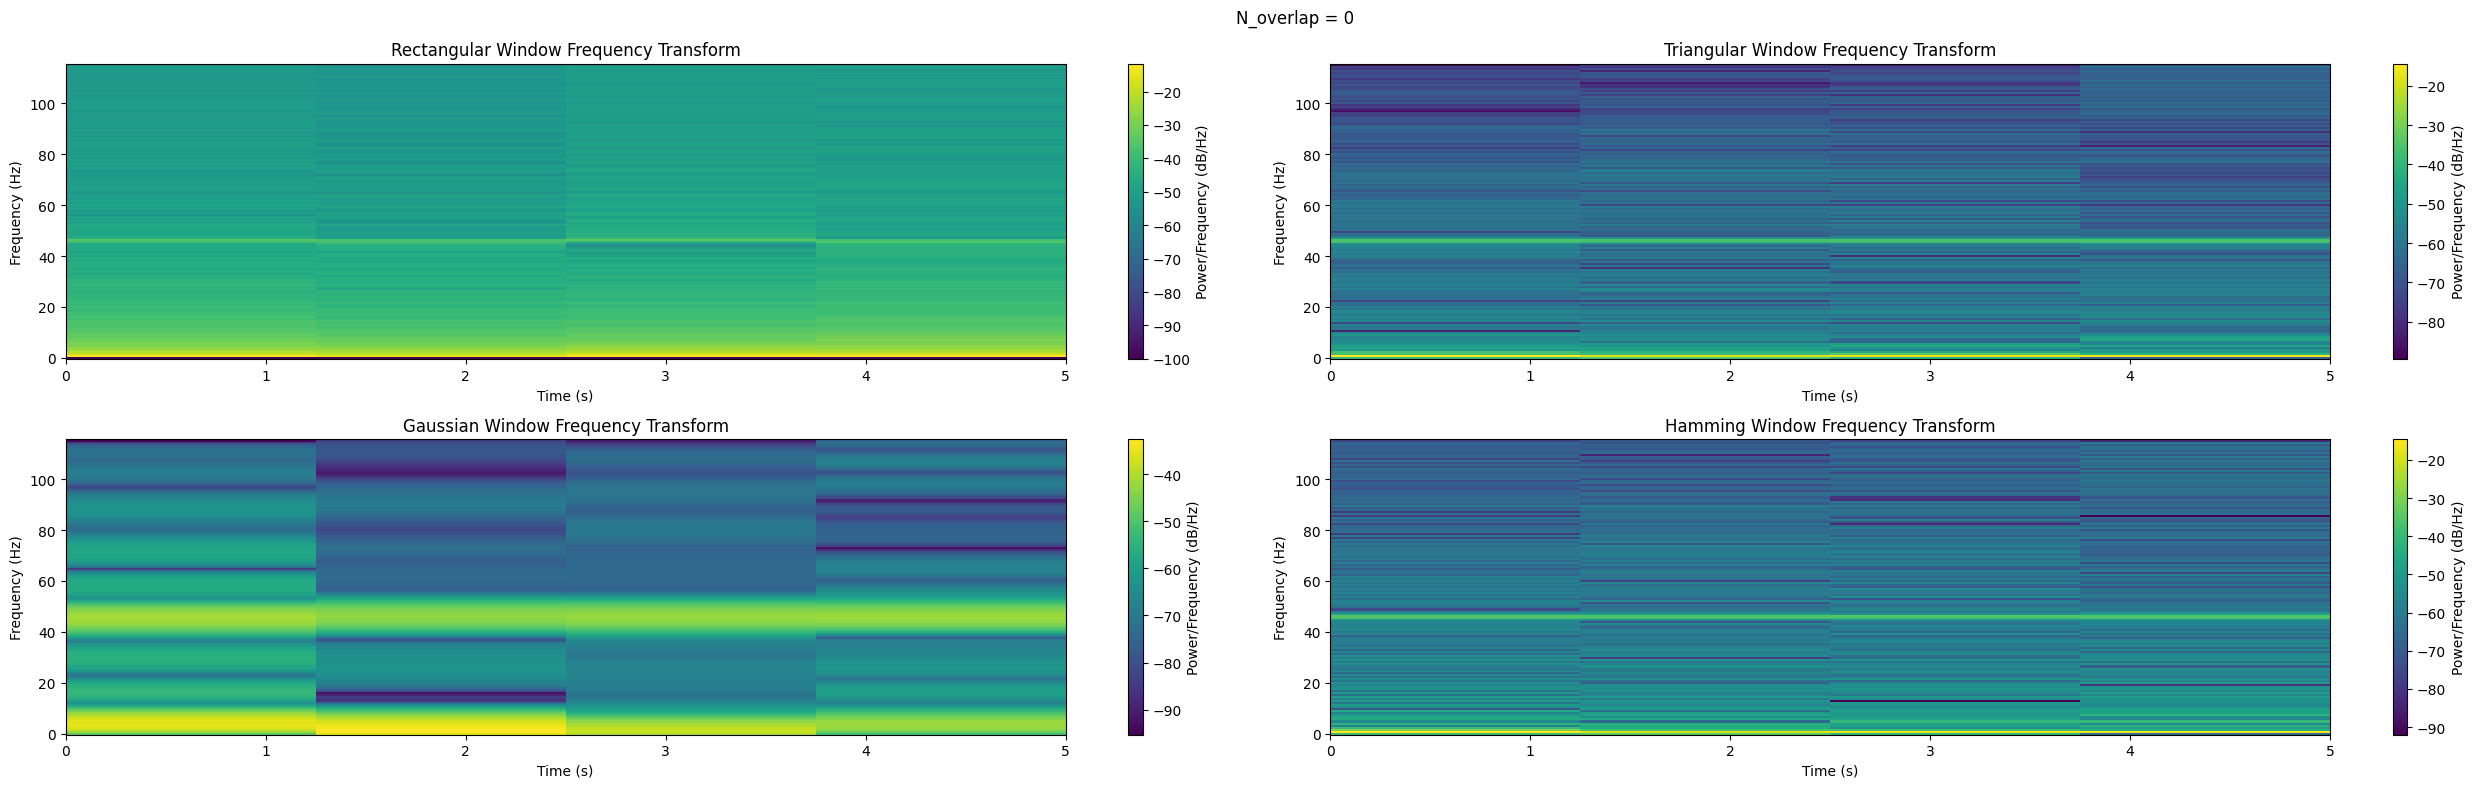

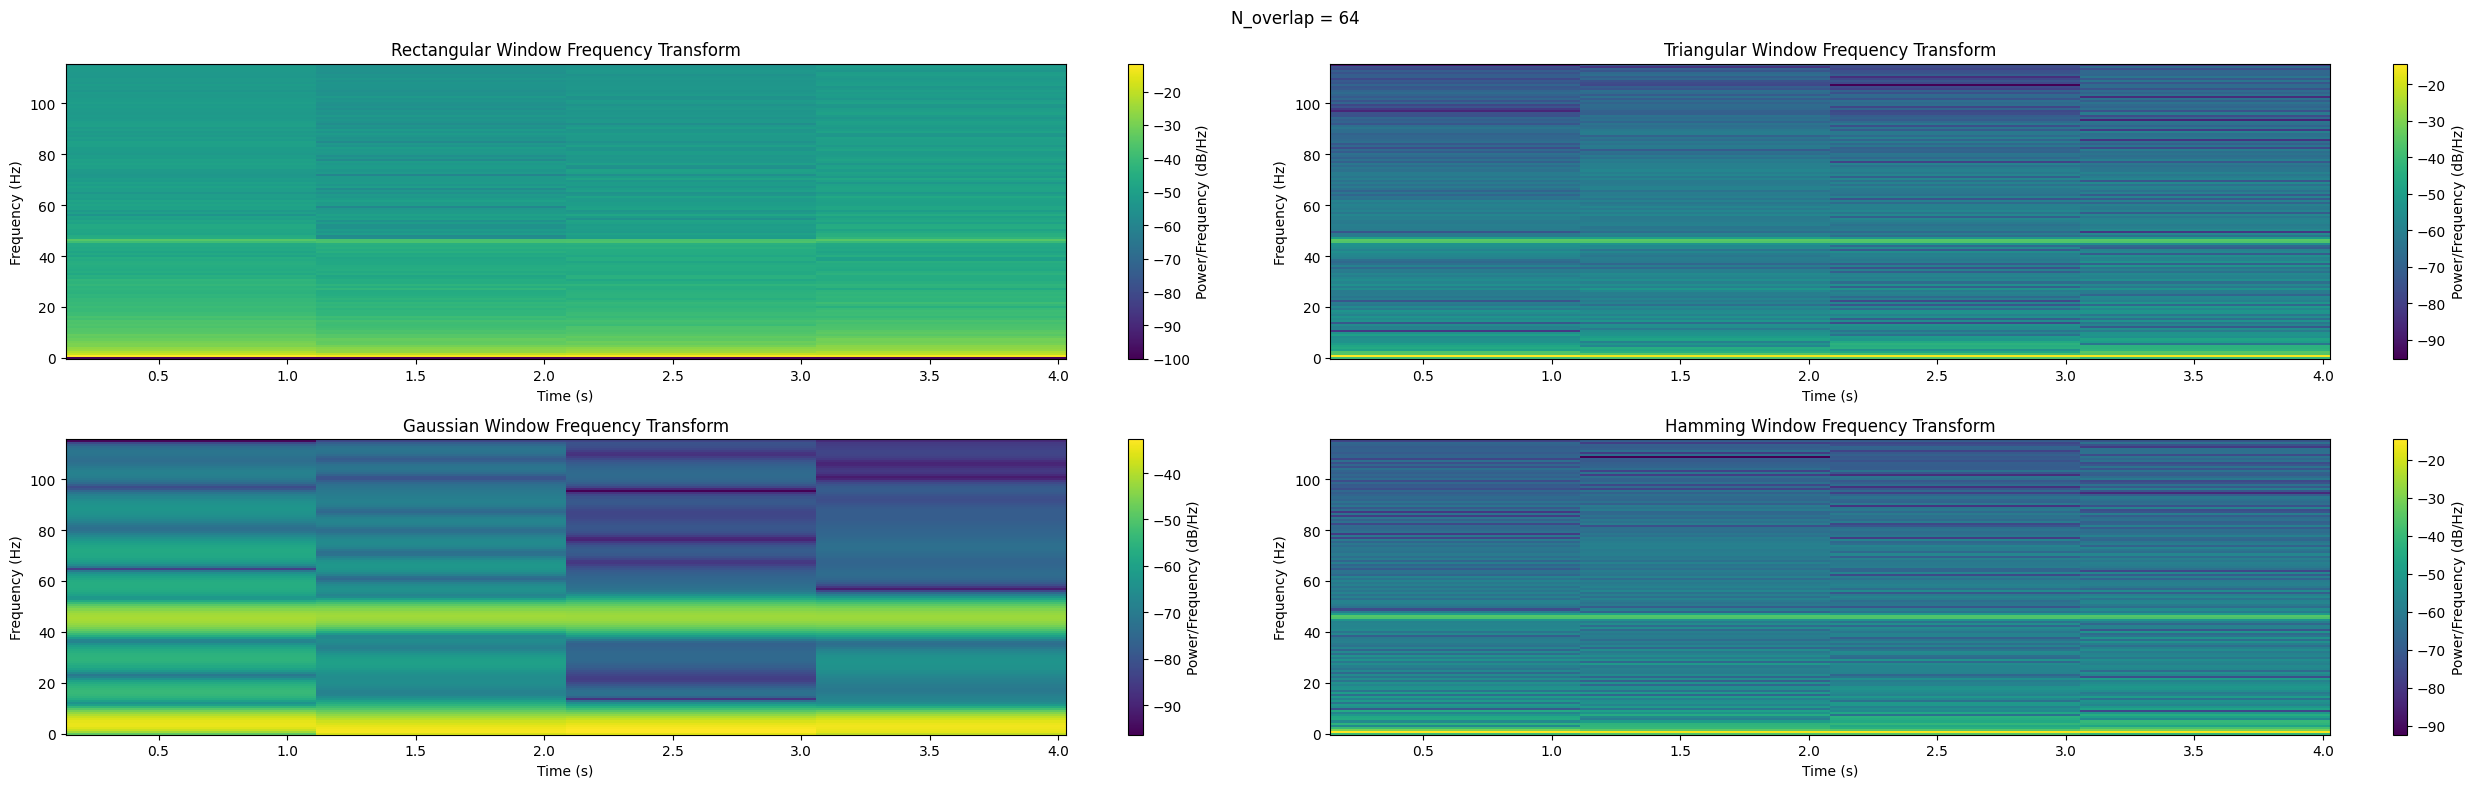

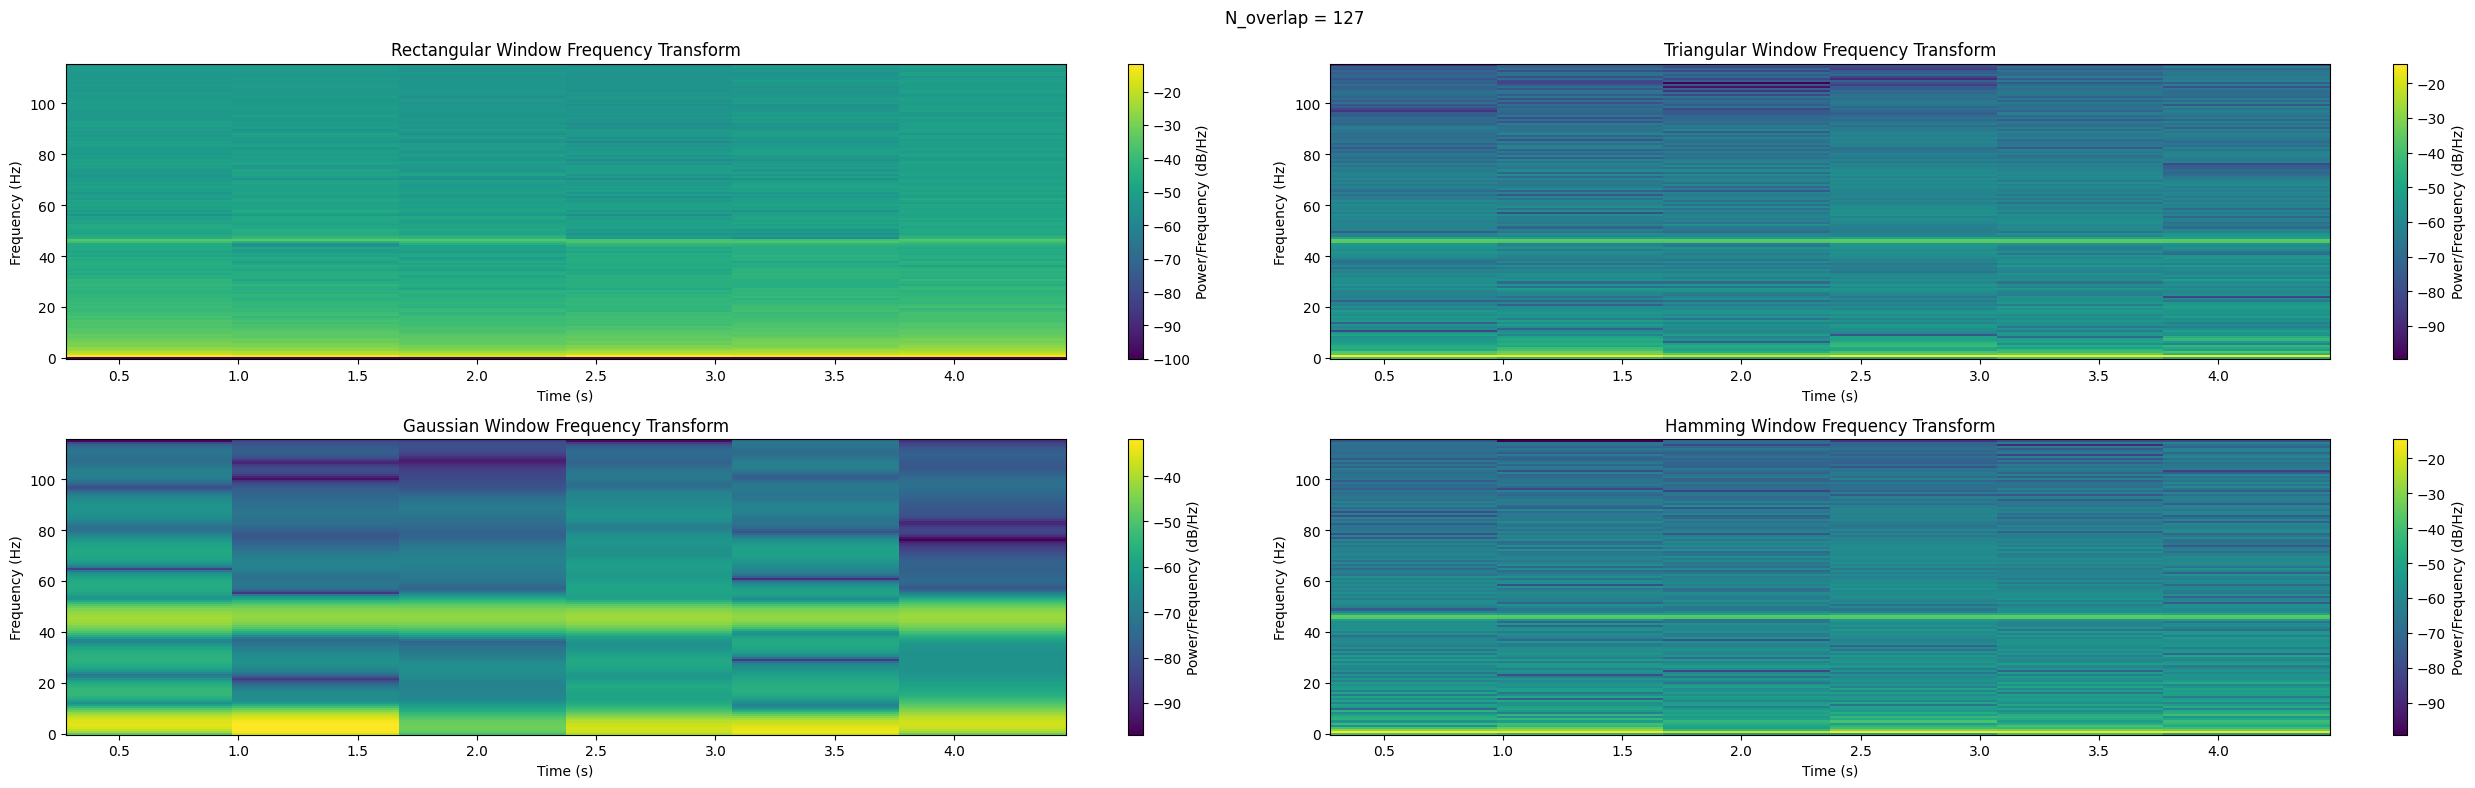

In [10]:


noverlaps = [0, 64, 127]
NFFT = L

for noverlap in noverlaps:
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(signal, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(signal, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(signal, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(signal, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("N_overlap = {}".format(noverlap))
    plt.tight_layout()
    plt.show()

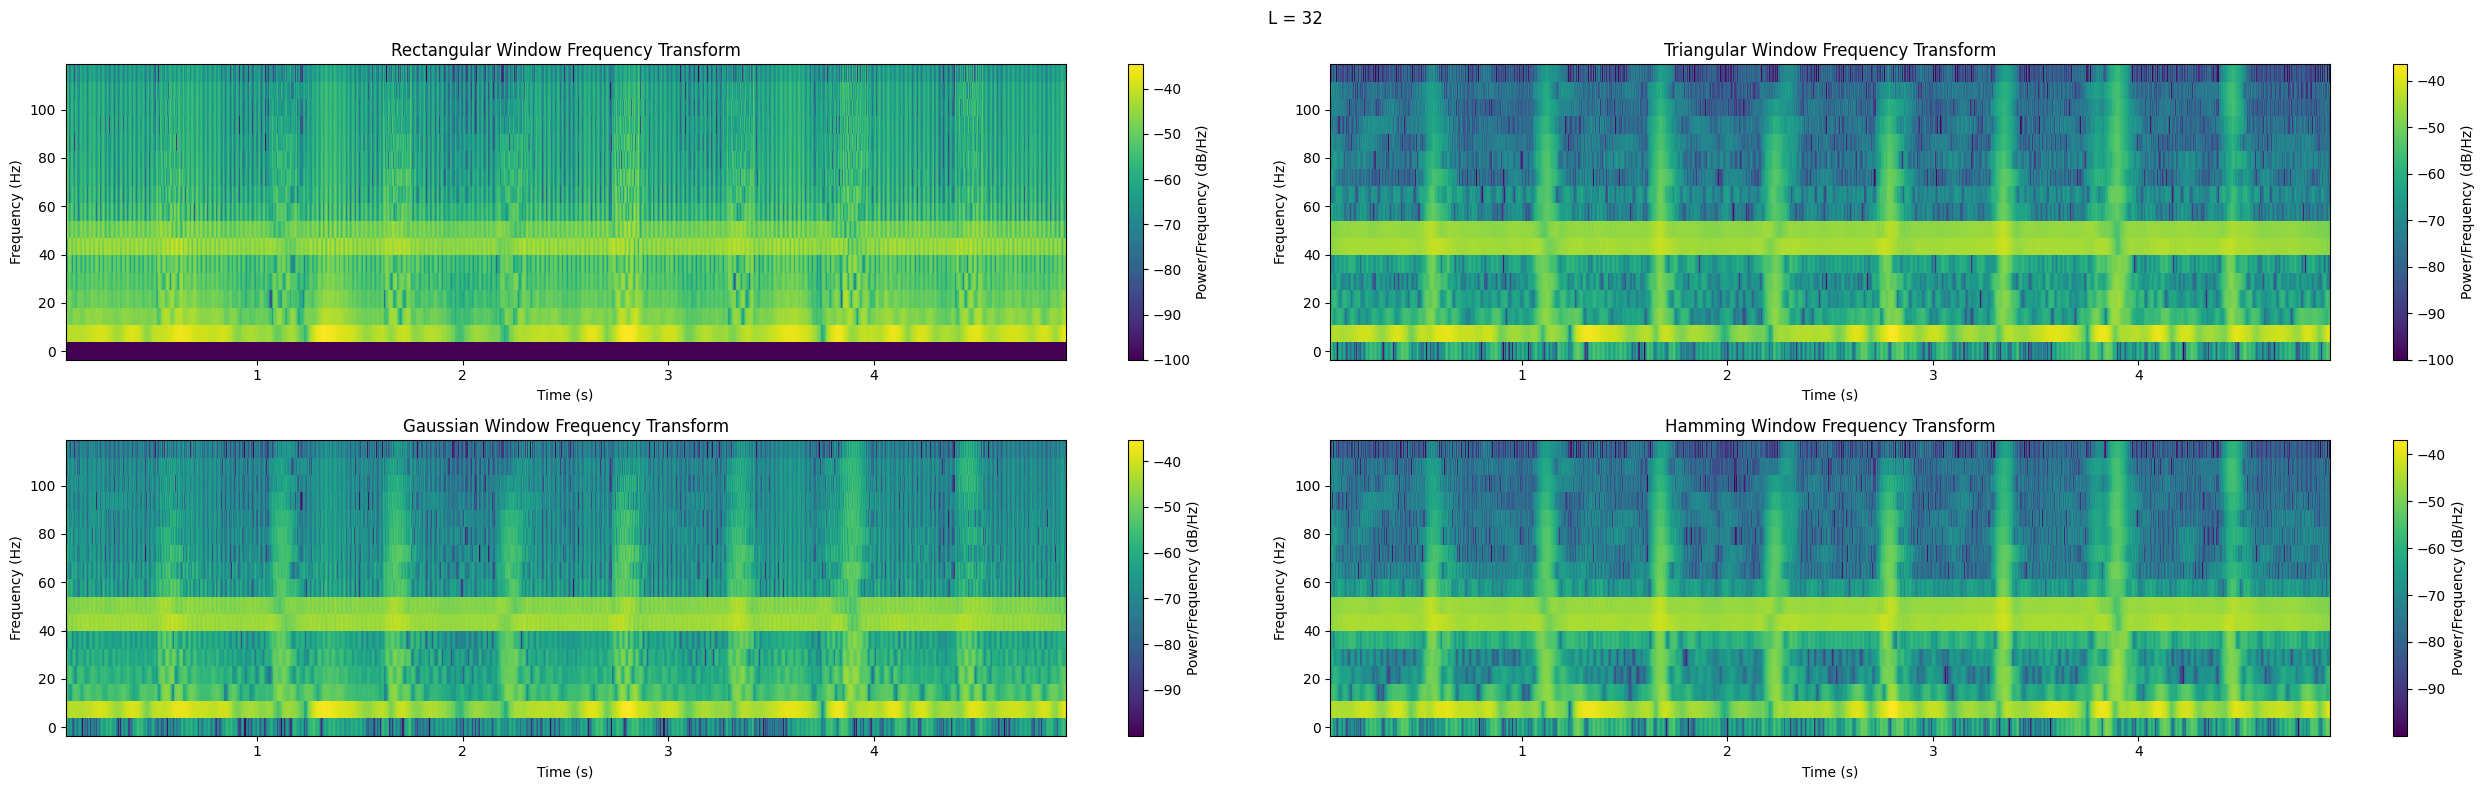

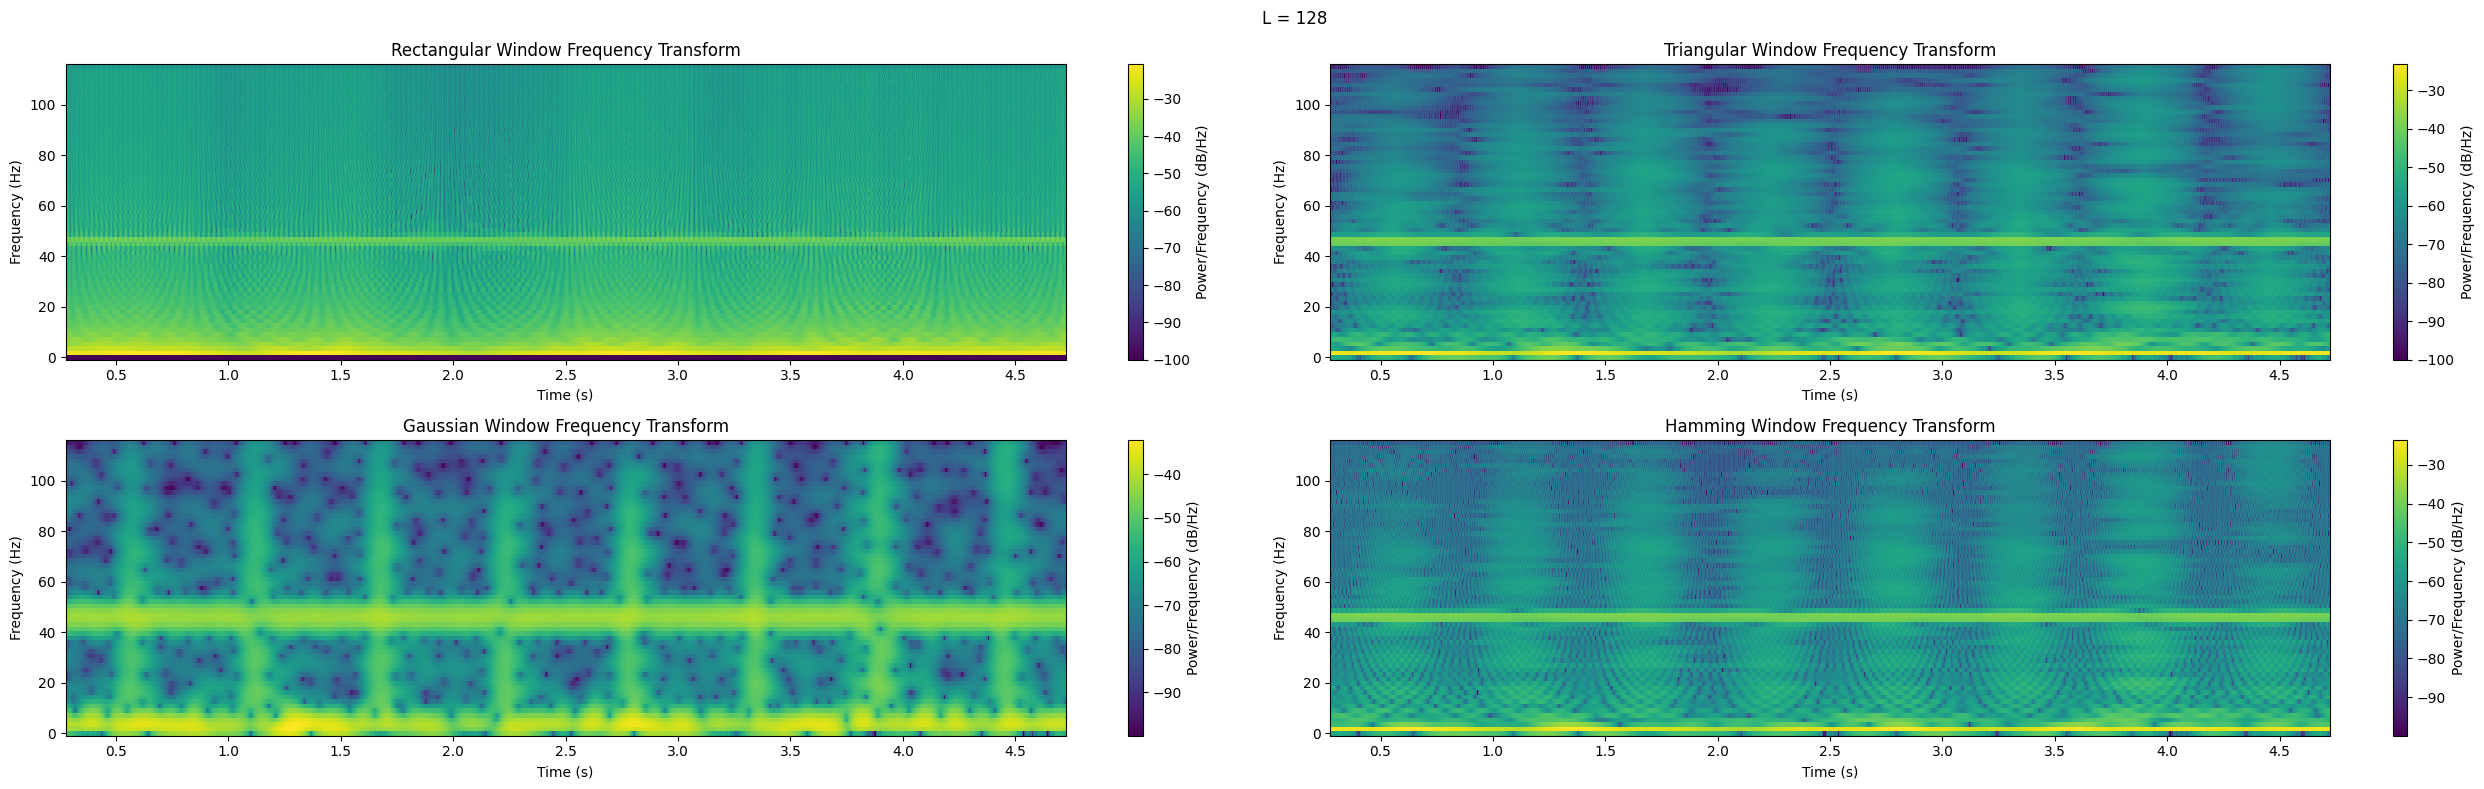

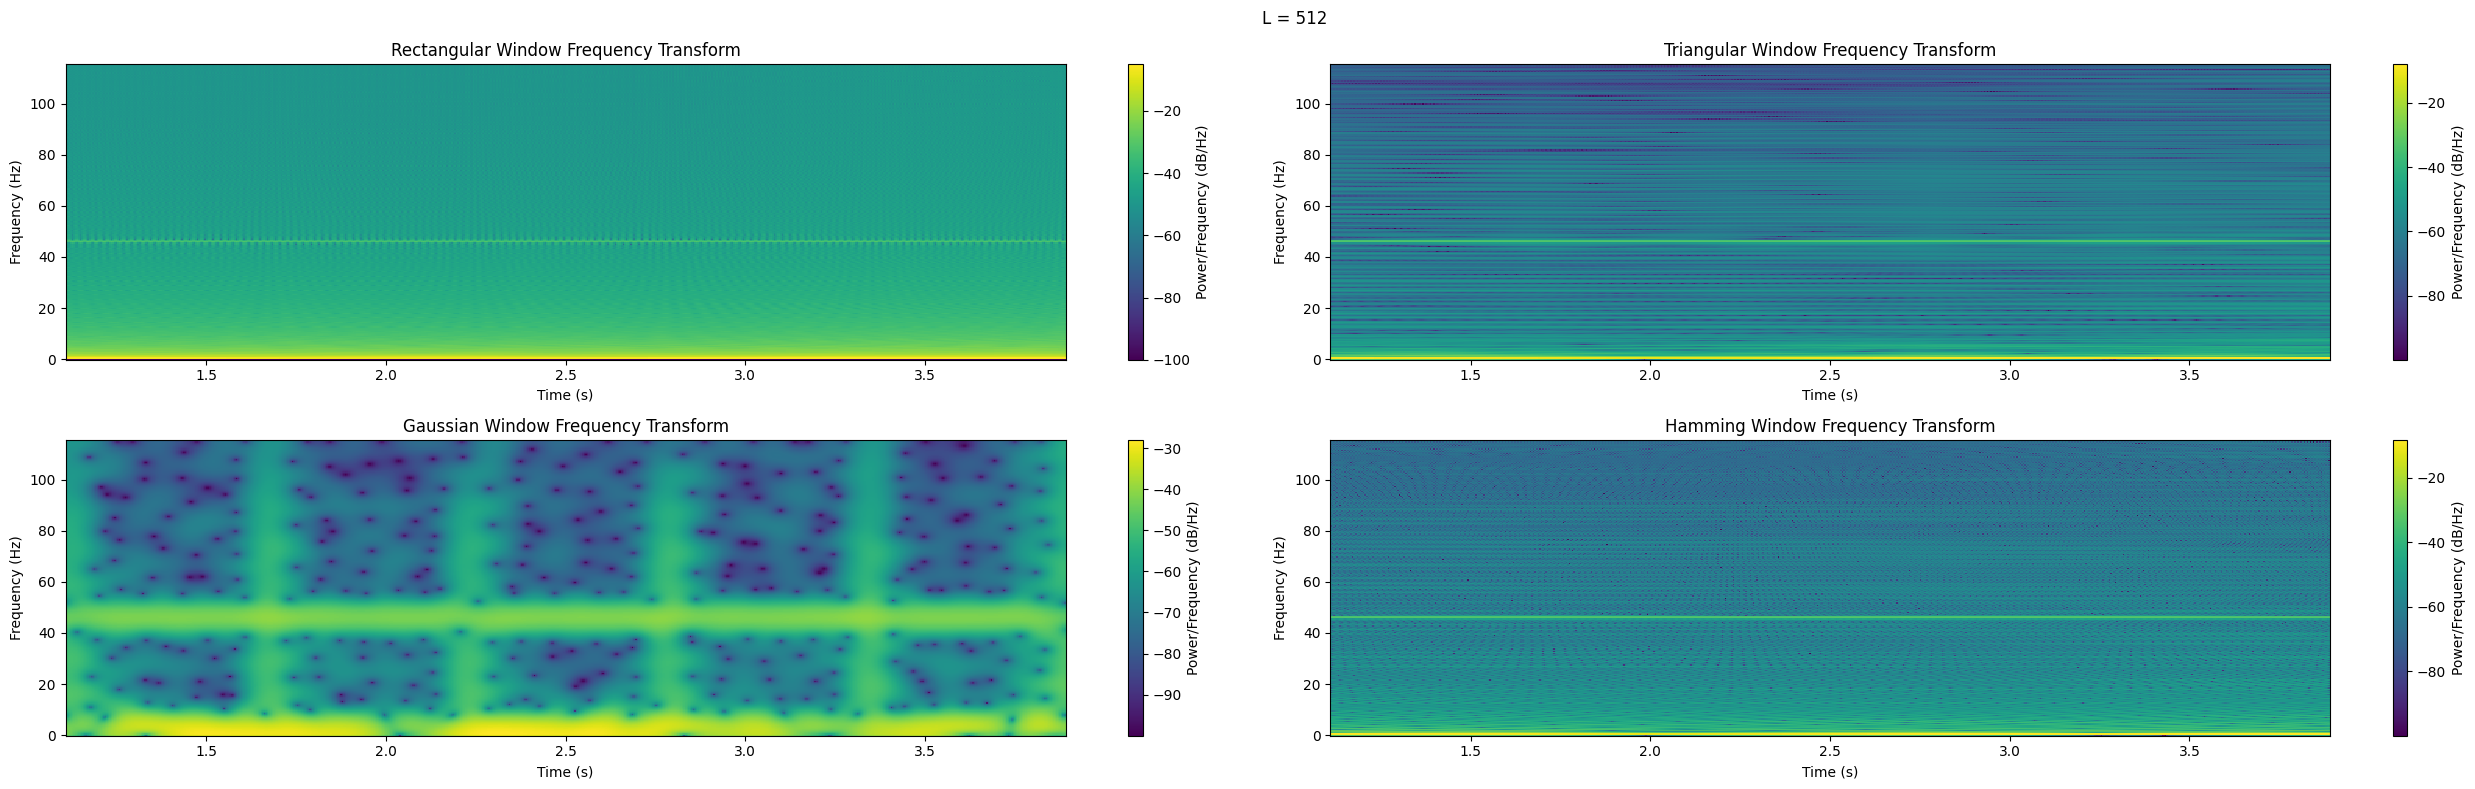

In [11]:
Ls = [32, 128, 512]
for L in Ls:
    noverlap = L - 1
    NFFT = L
    rectangular_window = get_window('boxcar', L)
    triangular_window = get_window('triang', L)
    gauss_window = get_window(('gaussian', std), L)
    hamming_window = get_window('hamming', L)

    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(signal, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(signal, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(signal, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(signal, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("L = {}".format(L))
    plt.tight_layout()
    plt.show()

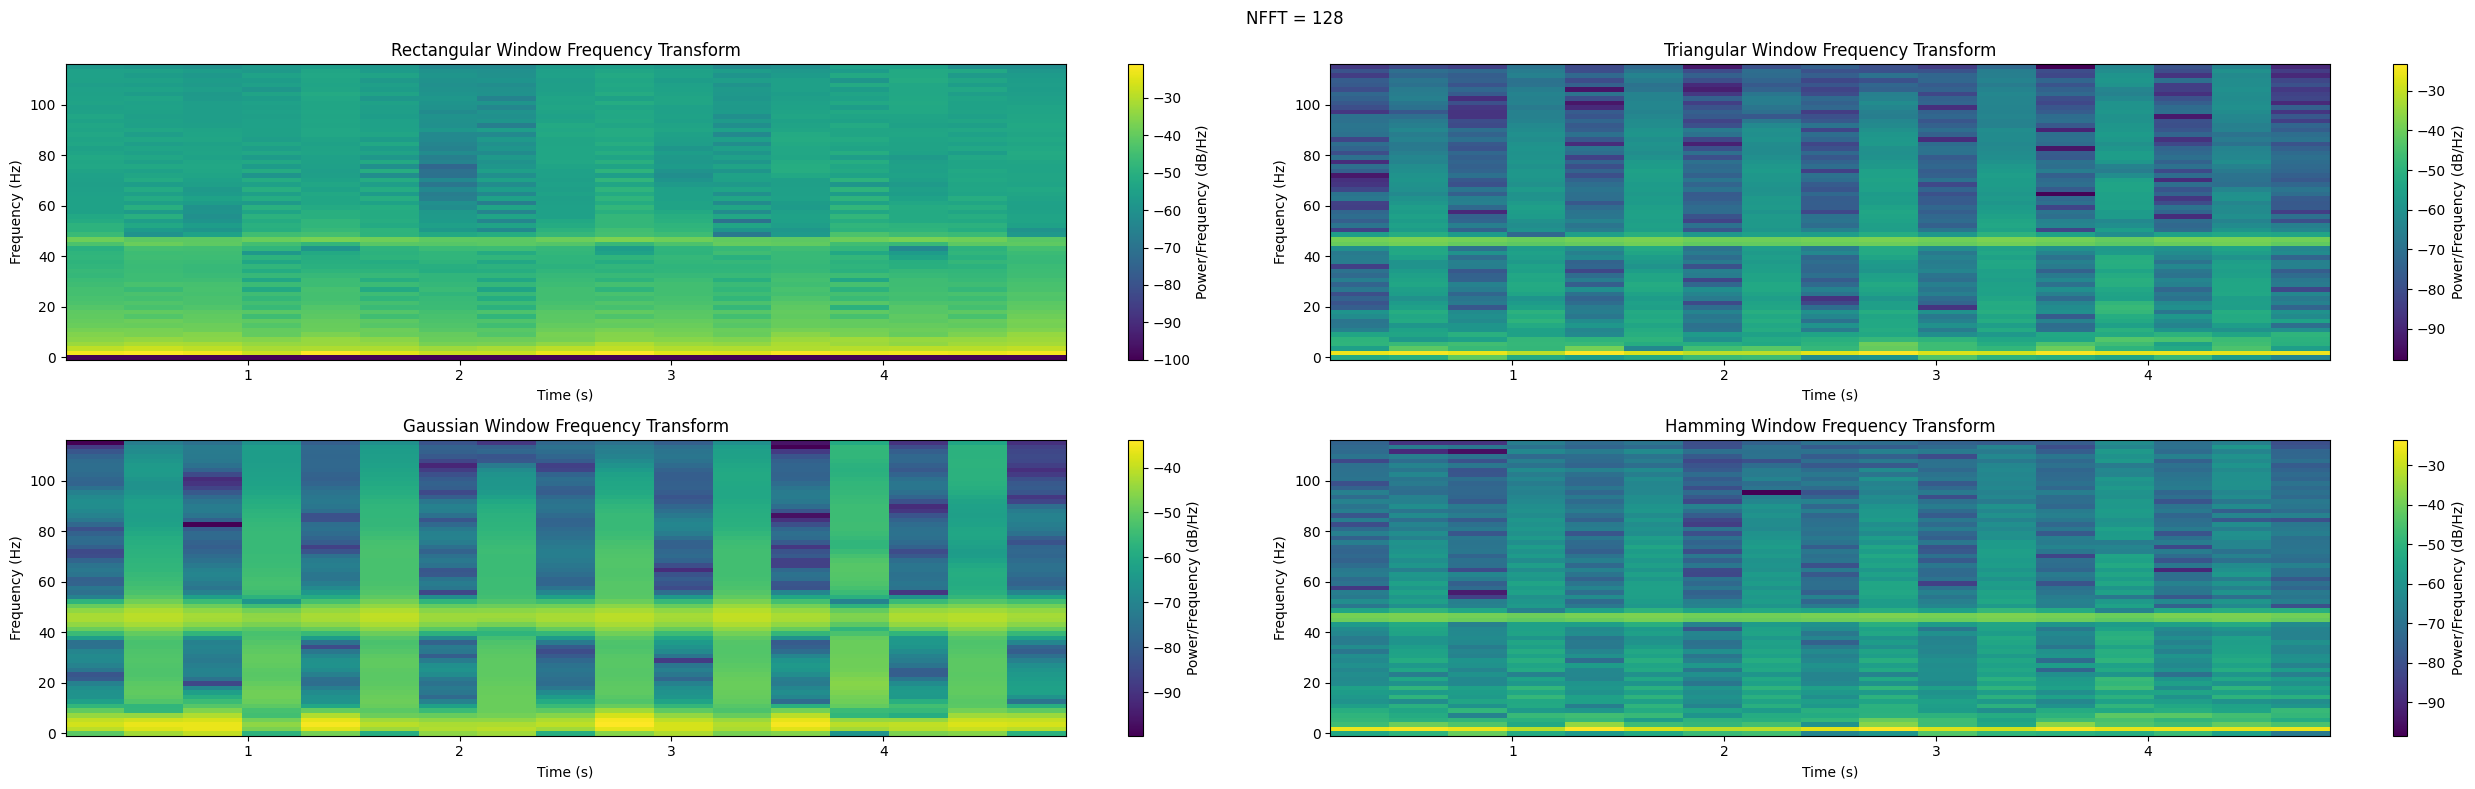

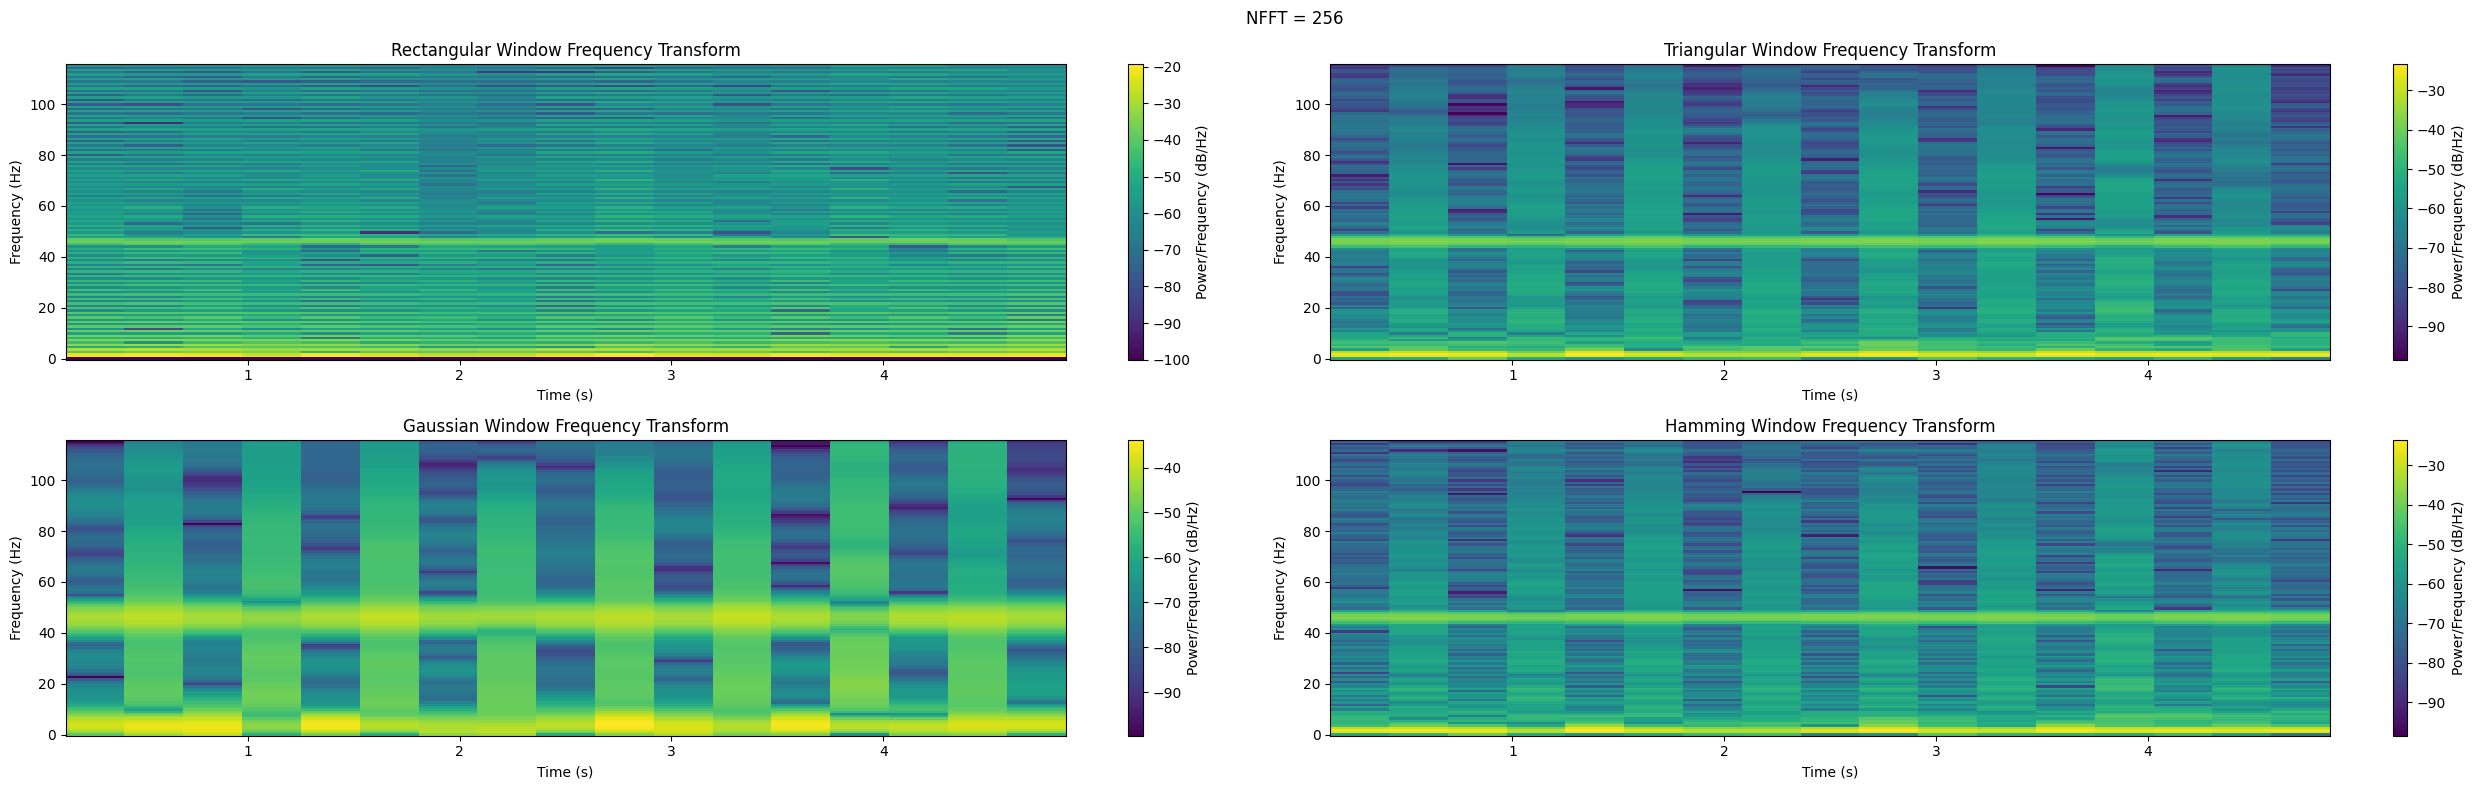

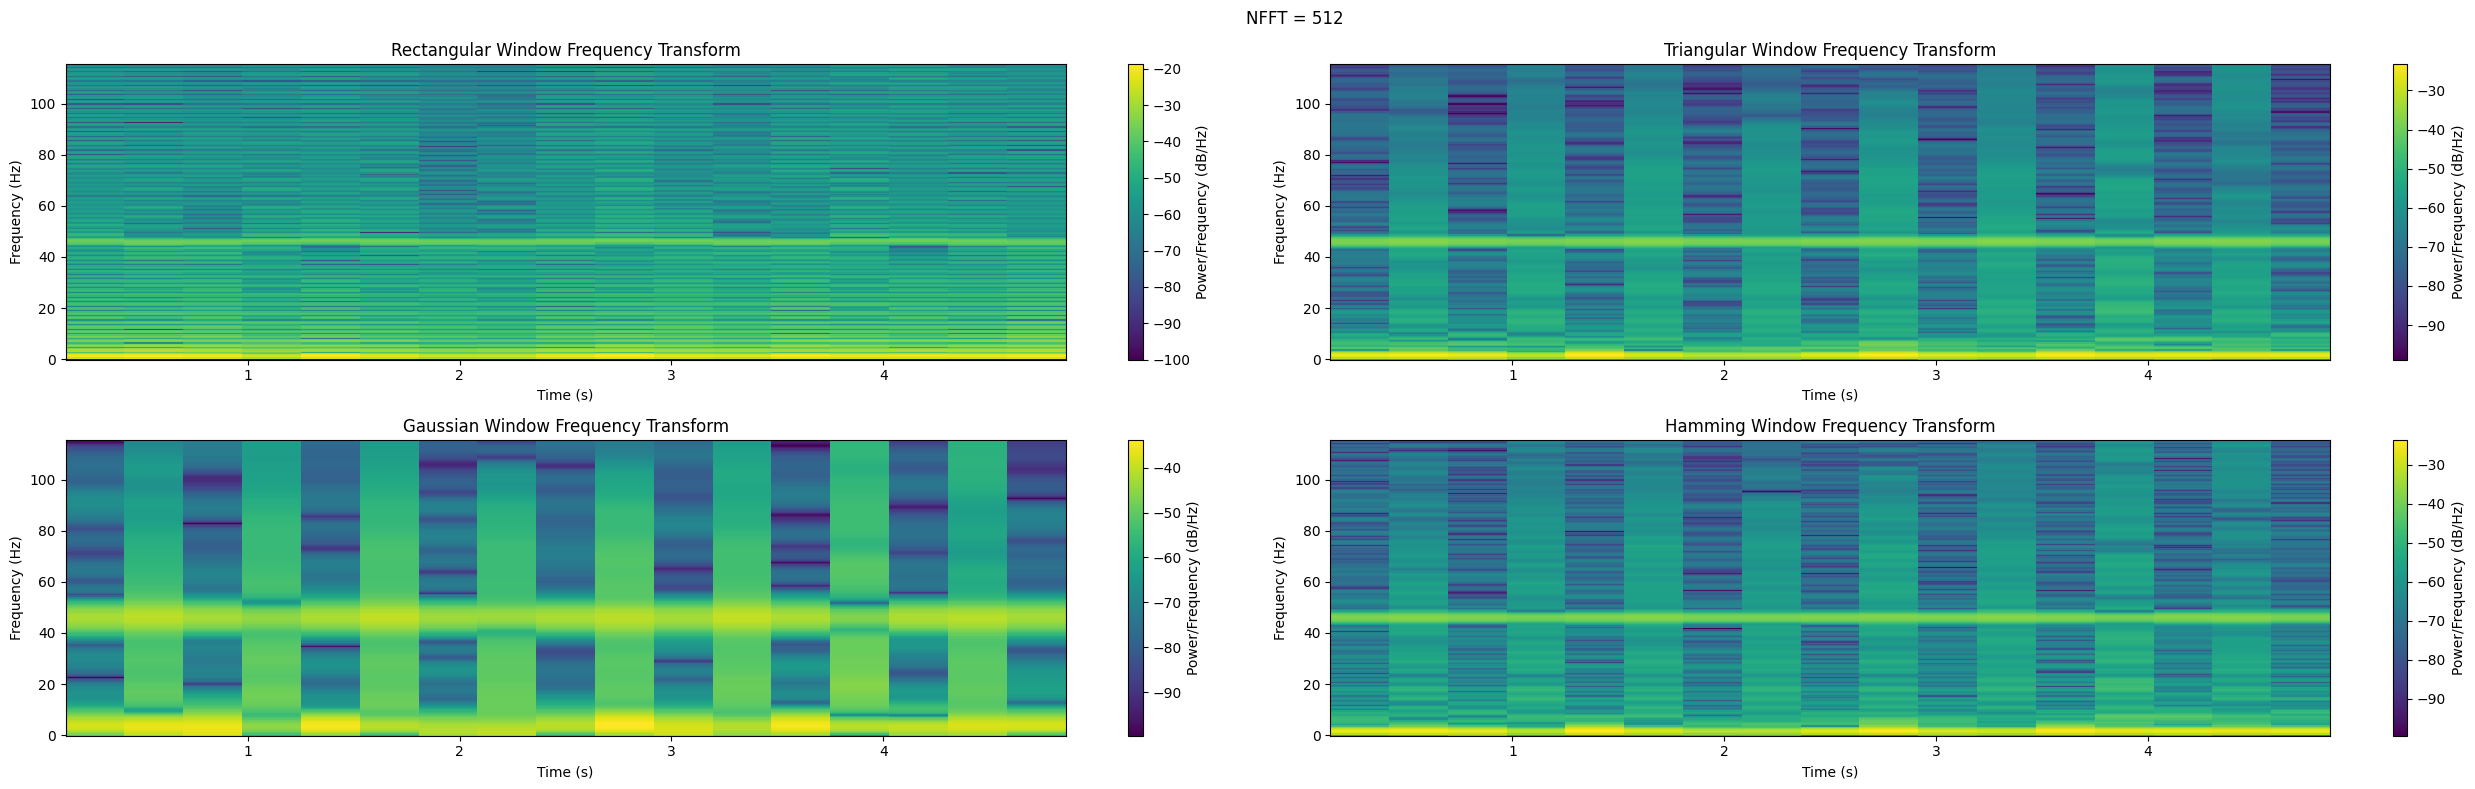

In [12]:
L = 128
NFFTs = [L, 2*L, 4*L]
noverlap = L // 2
rectangular_window = get_window('boxcar', L)
triangular_window = get_window('triang', L)
gauss_window = get_window(('gaussian', std), L)
hamming_window = get_window('hamming', L)

for NFFT in NFFTs:
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(signal, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(signal, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(signal, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(signal, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("NFFT = {}".format(NFFT))
    plt.tight_layout()
    plt.show()

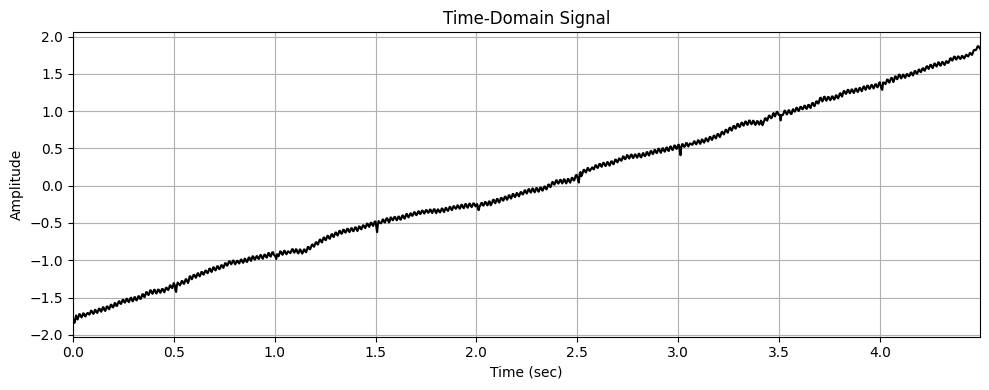

In [13]:
#time domain signal
fs = 256 #Hz
t = np.arange(0, len(signal)) / fs

plt.figure(figsize=(10, 4))
plt.plot(t, signal, 'k')
plt.title("Time-Domain Signal")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, t[-1])
plt.tight_layout()
plt.show()

In [14]:
from scipy.fft import fft

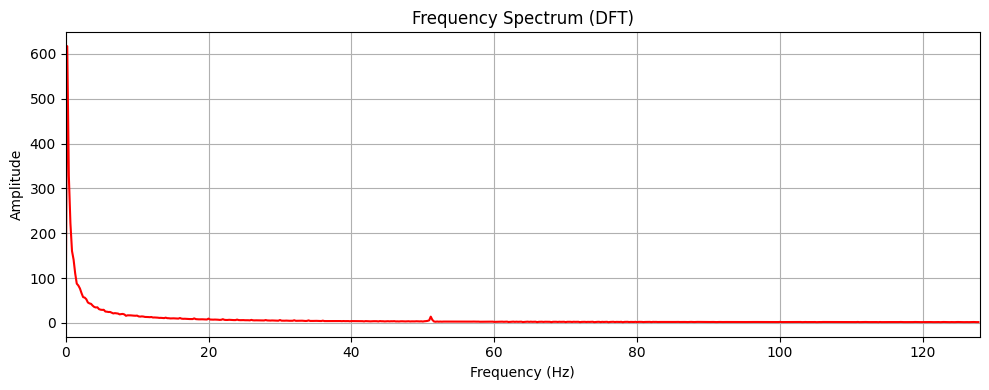

In [15]:
#frequency spectrum (DFT)
dft = fft(signal.to_numpy())
n = len(signal)
freq = np.fft.fftfreq(n, 1/fs)
positive_freq_indices = np.where(freq >= 0)
plt.figure(figsize=(10, 4))
plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r')
plt.title("Frequency Spectrum (DFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, fs/2)
plt.tight_layout()
plt.show()

In [16]:
from scipy.signal import stft

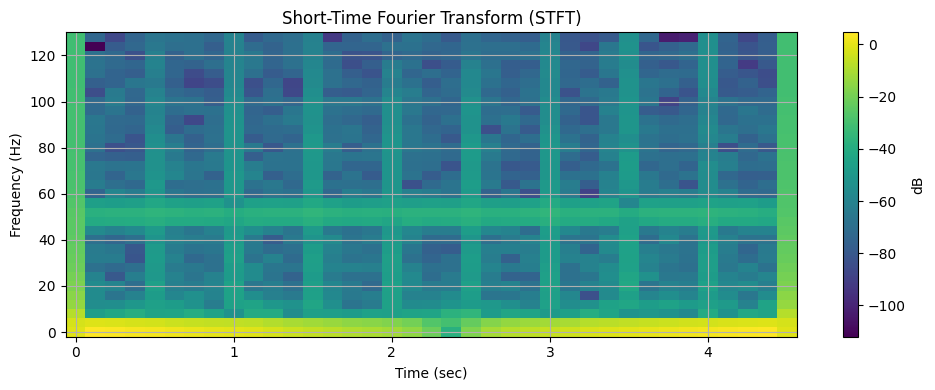

In [17]:
f, t, Zxx = stft(signal, fs=fs, nperseg=64)  # You can adjust nperseg for desired time and frequency resolution
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, 20 * np.log10(np.abs(Zxx)))
plt.title("Short-Time Fourier Transform (STFT)")
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="dB")
plt.grid(True)
plt.tight_layout()
plt.show()

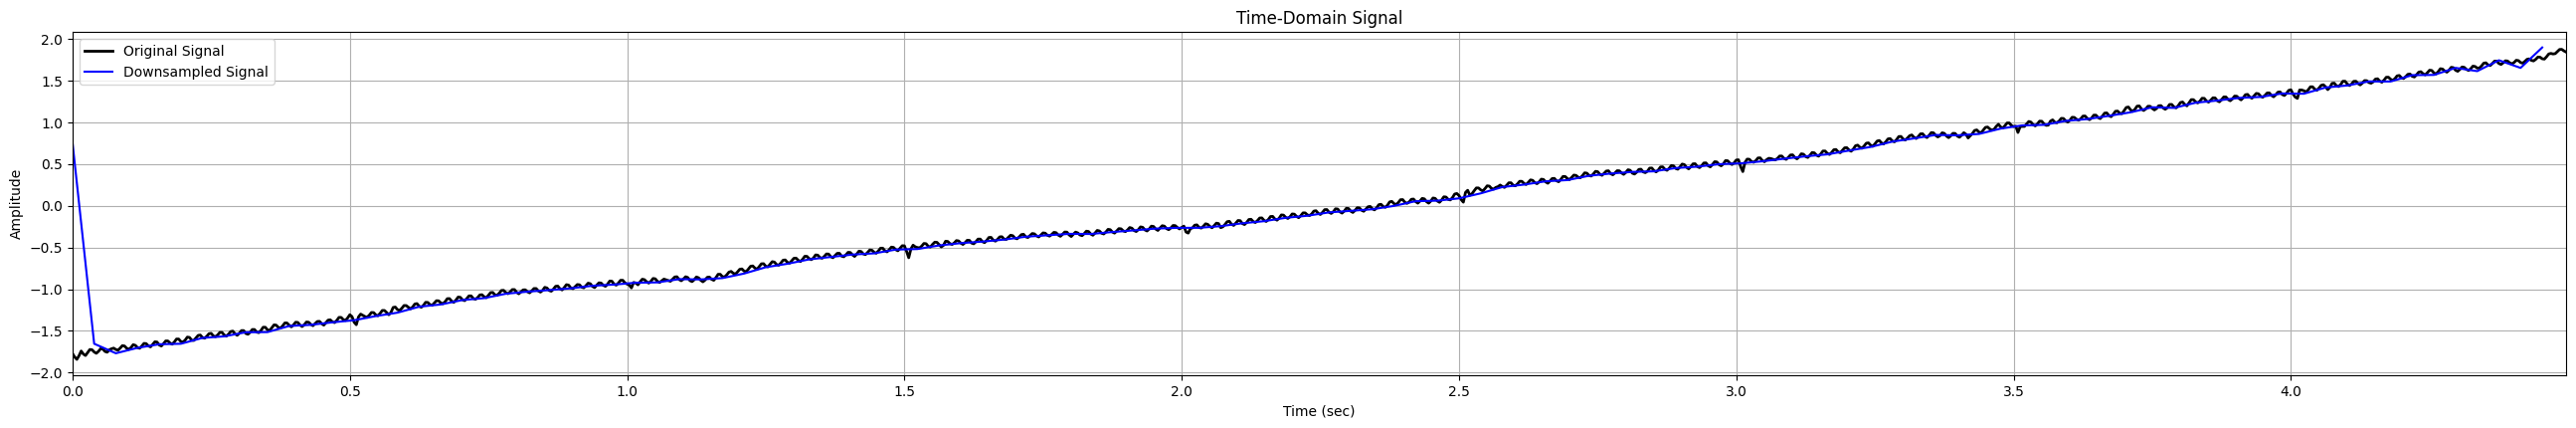

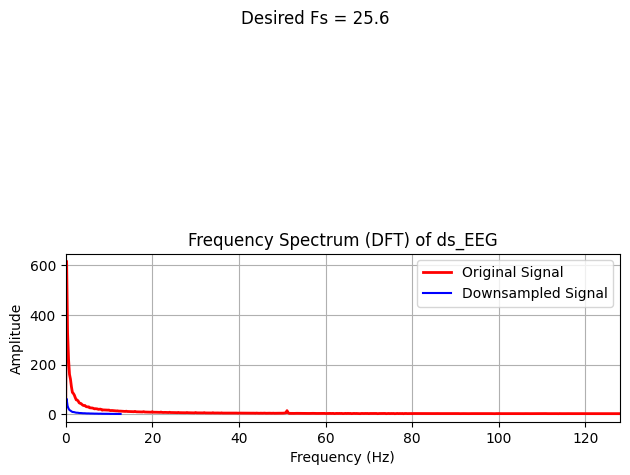

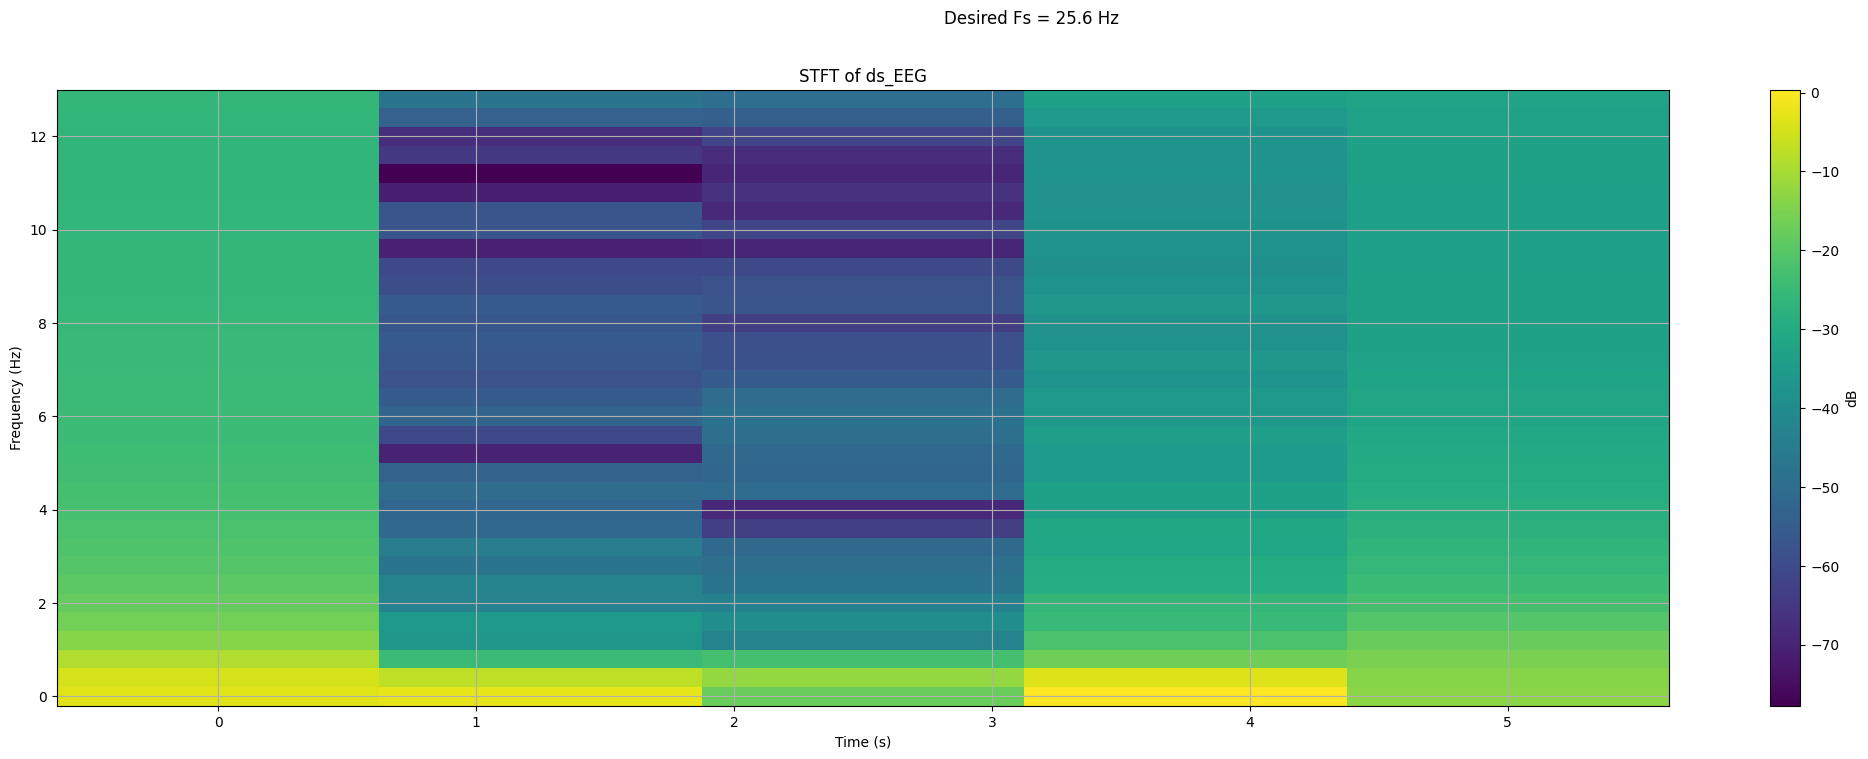

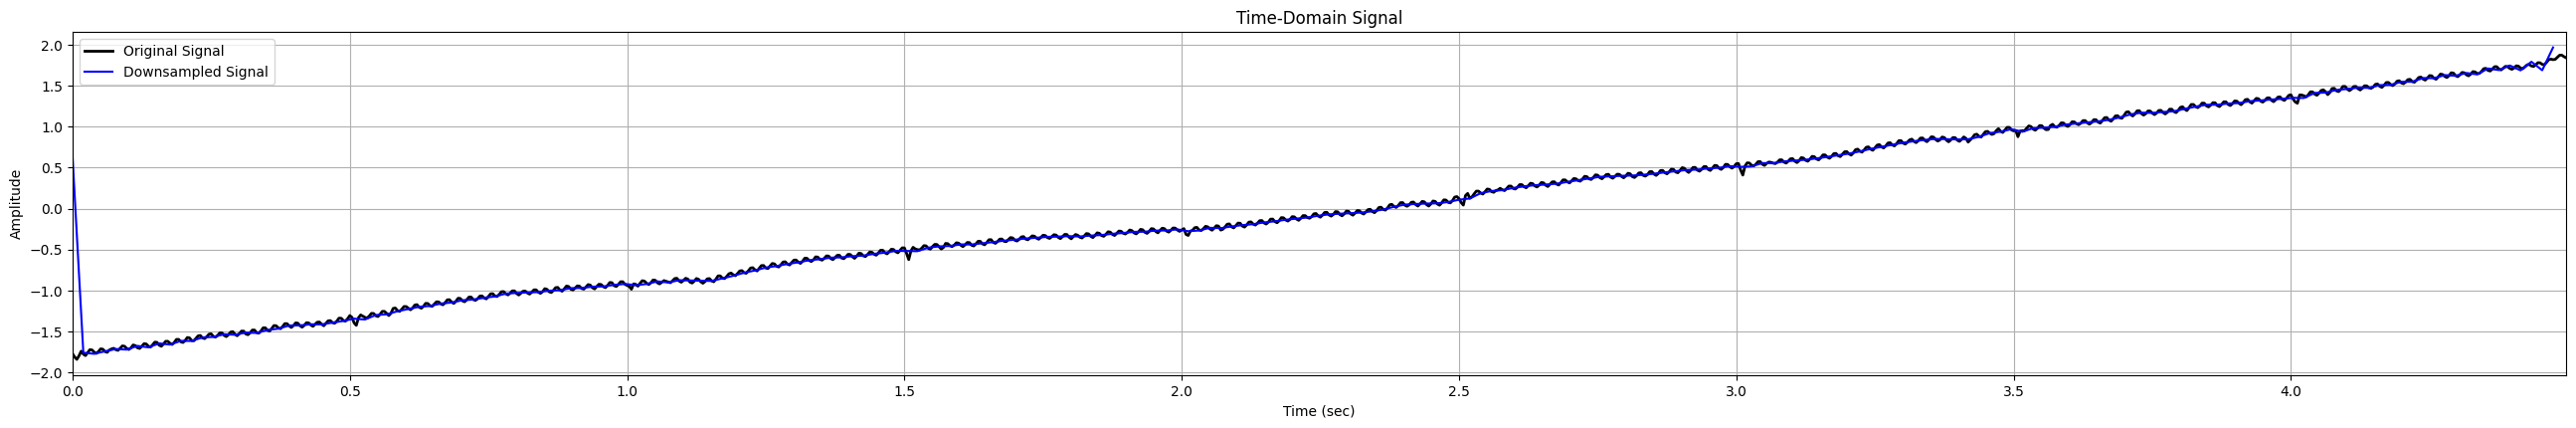

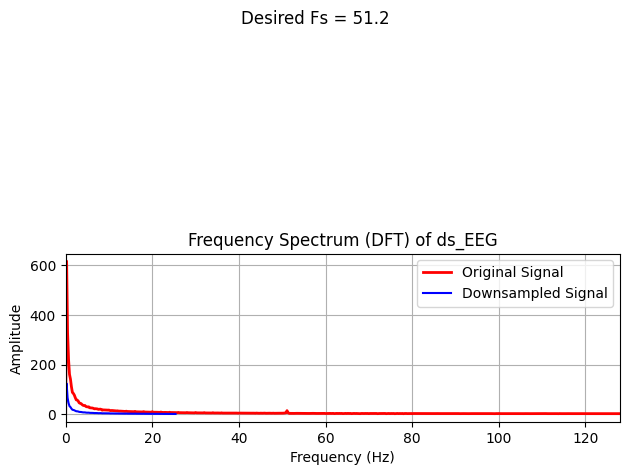

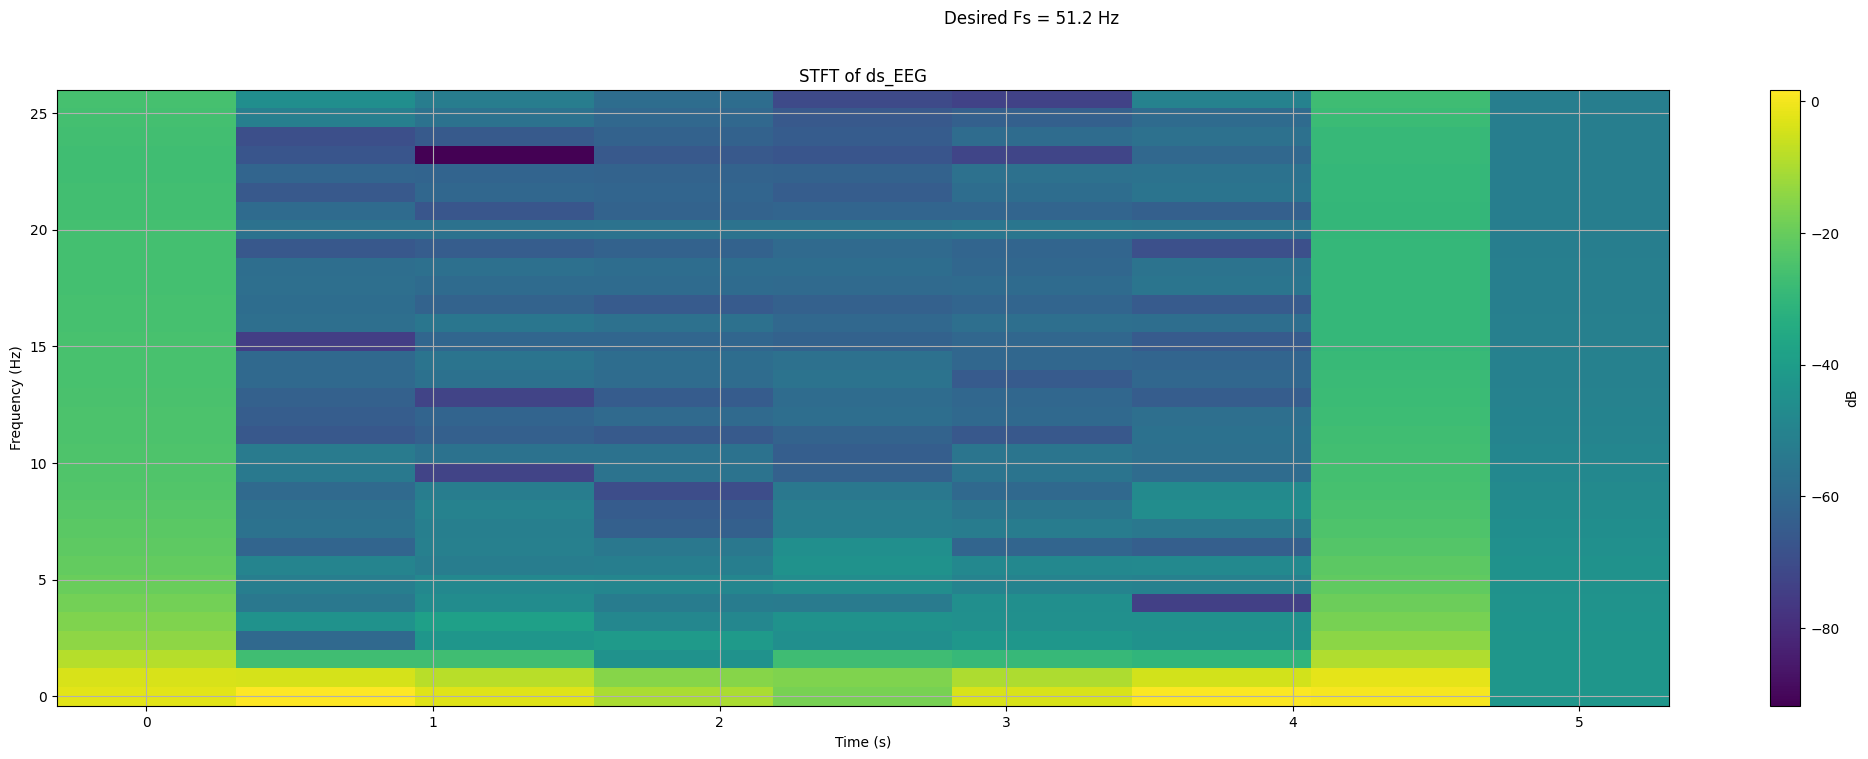

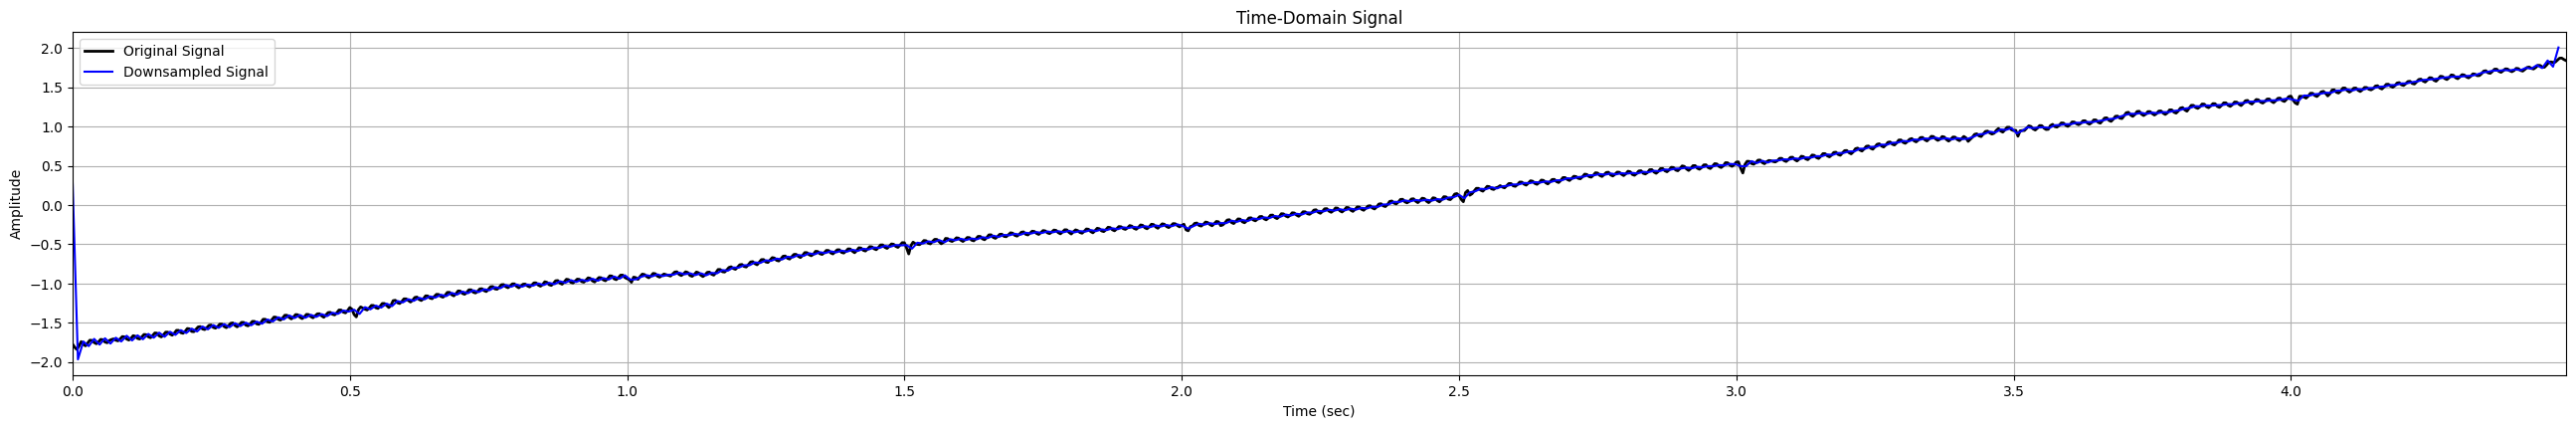

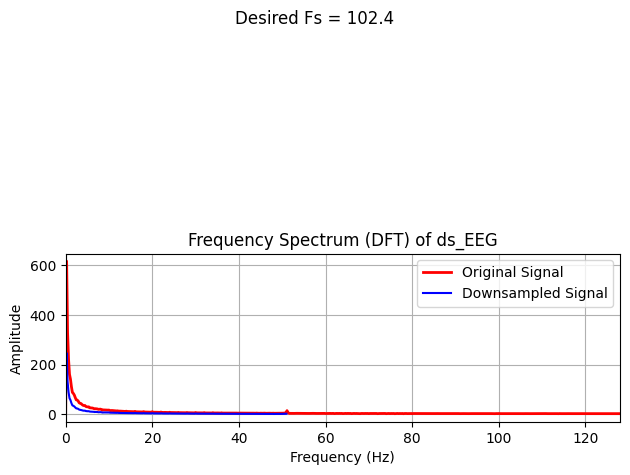

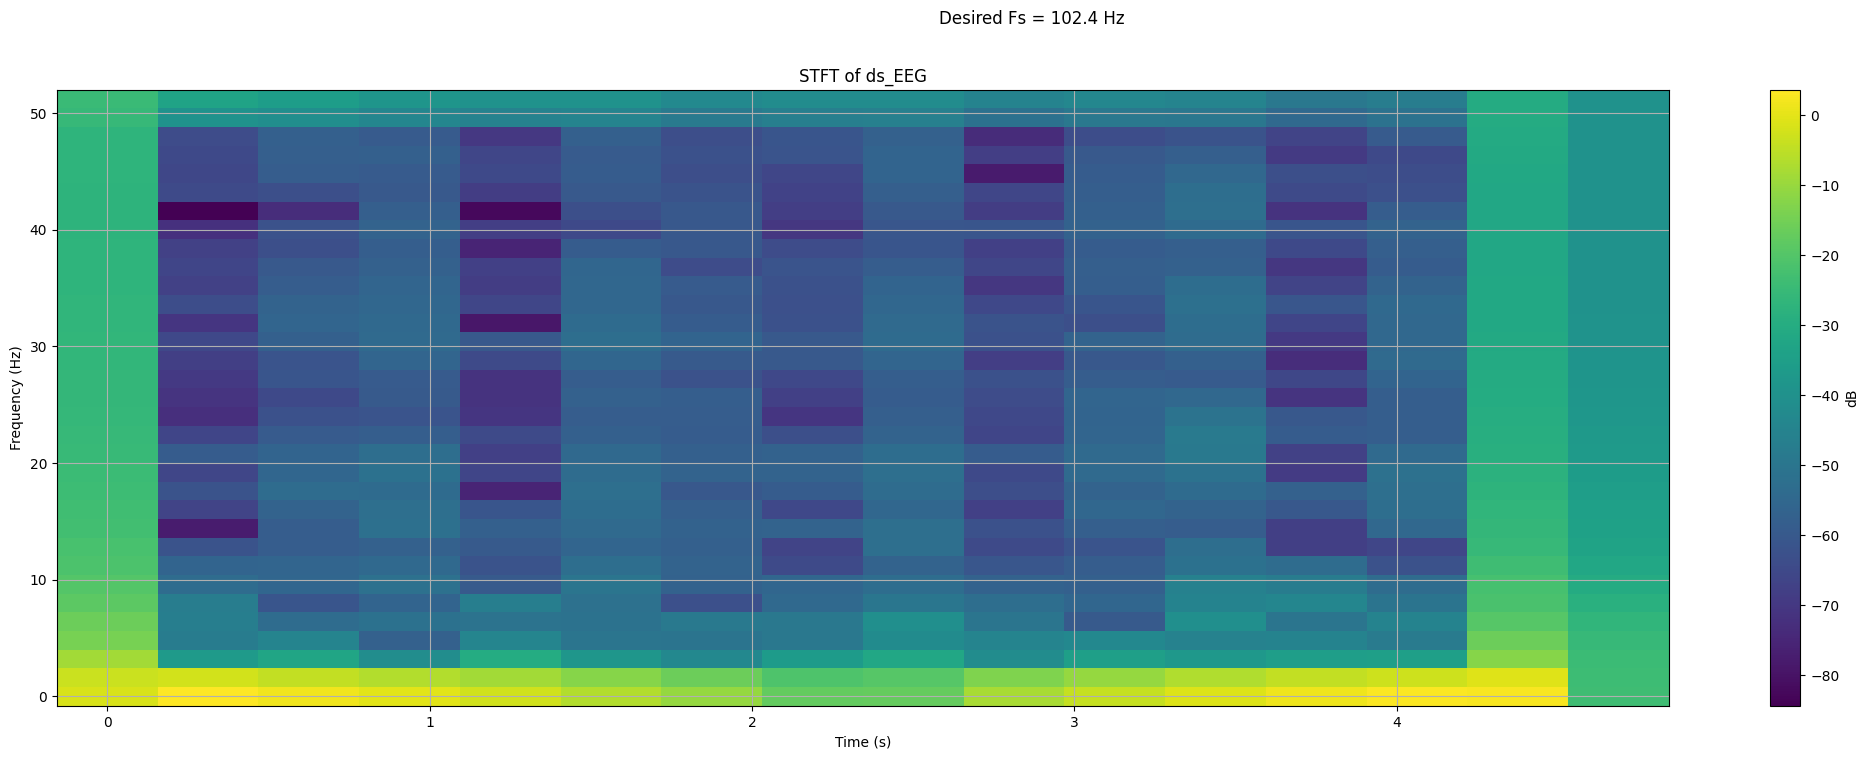

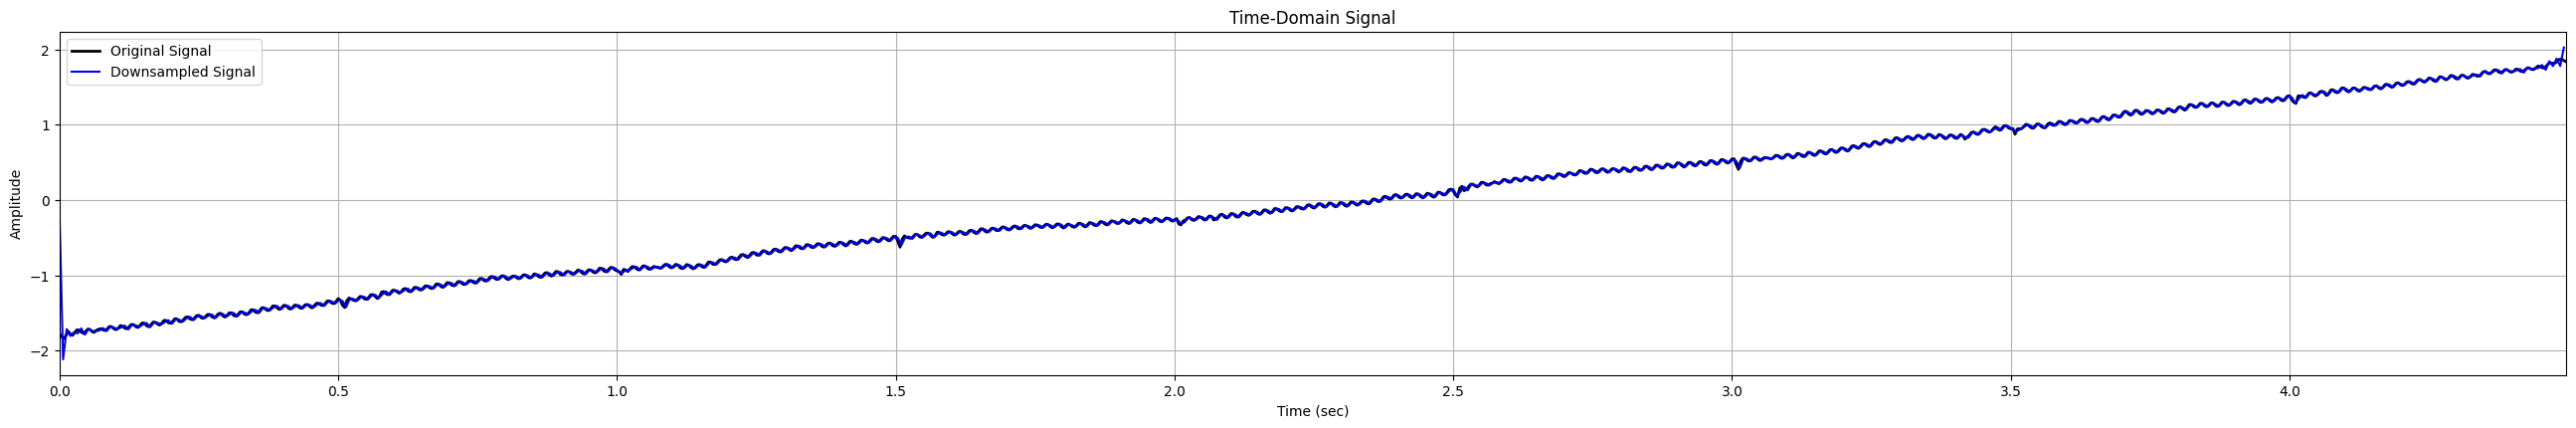

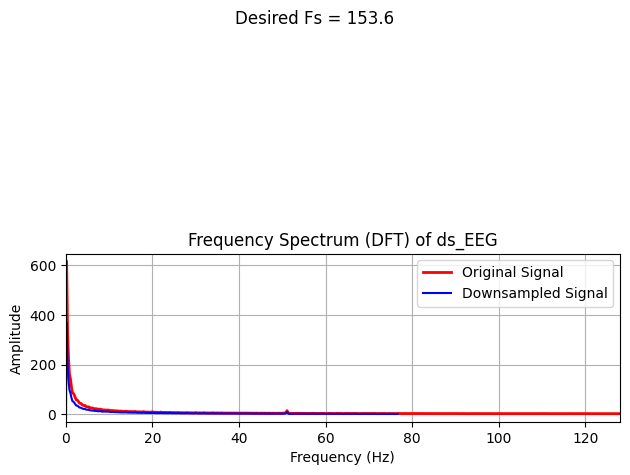

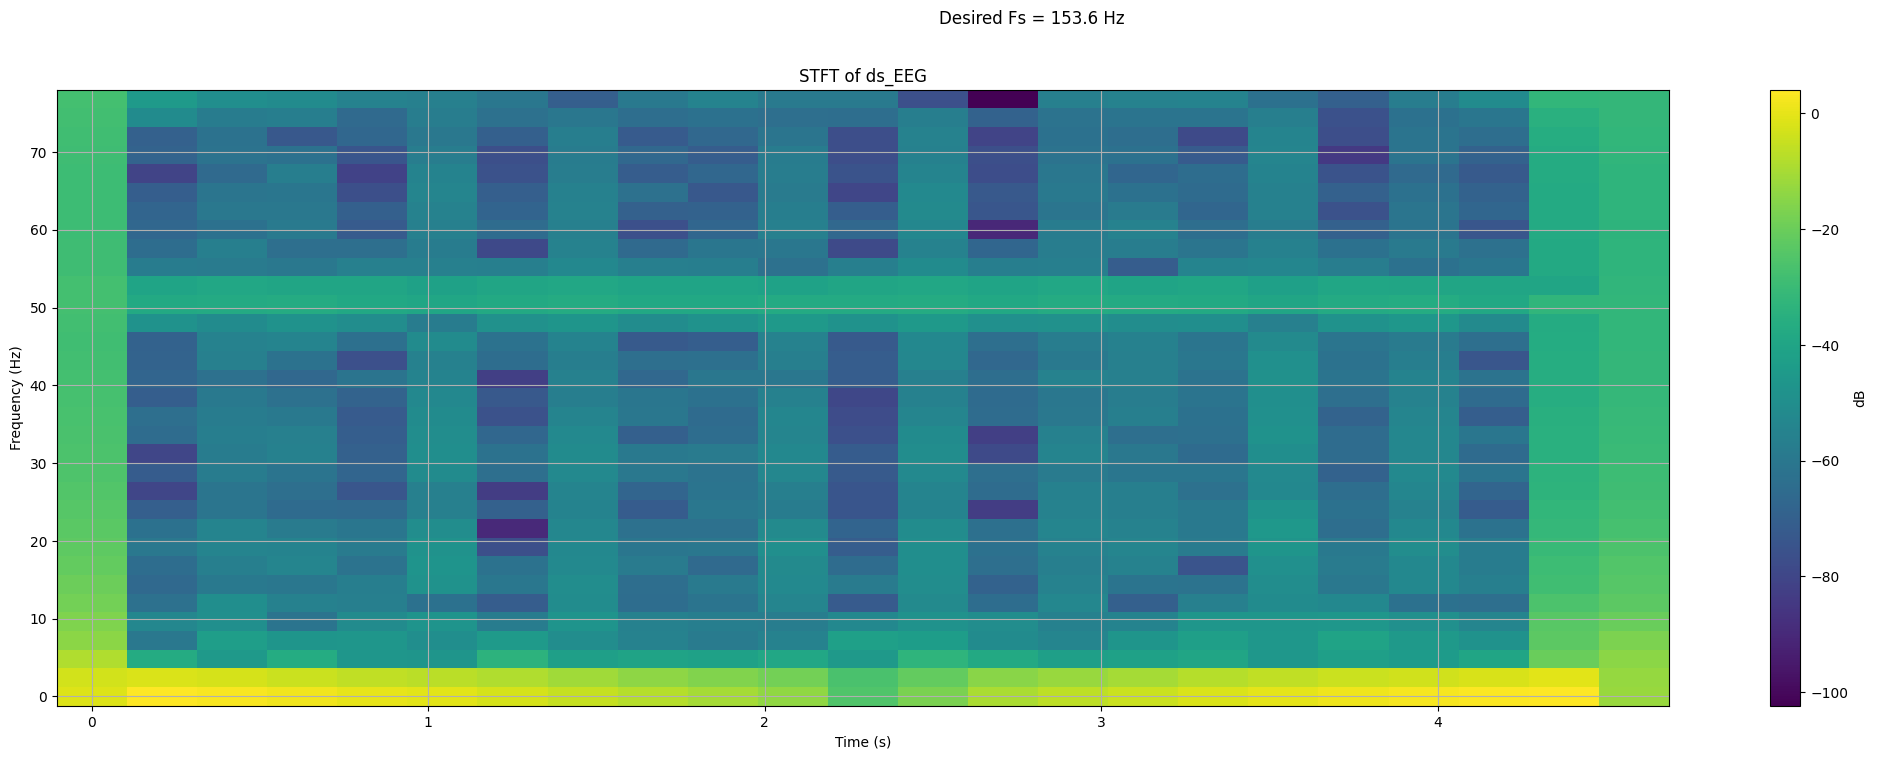

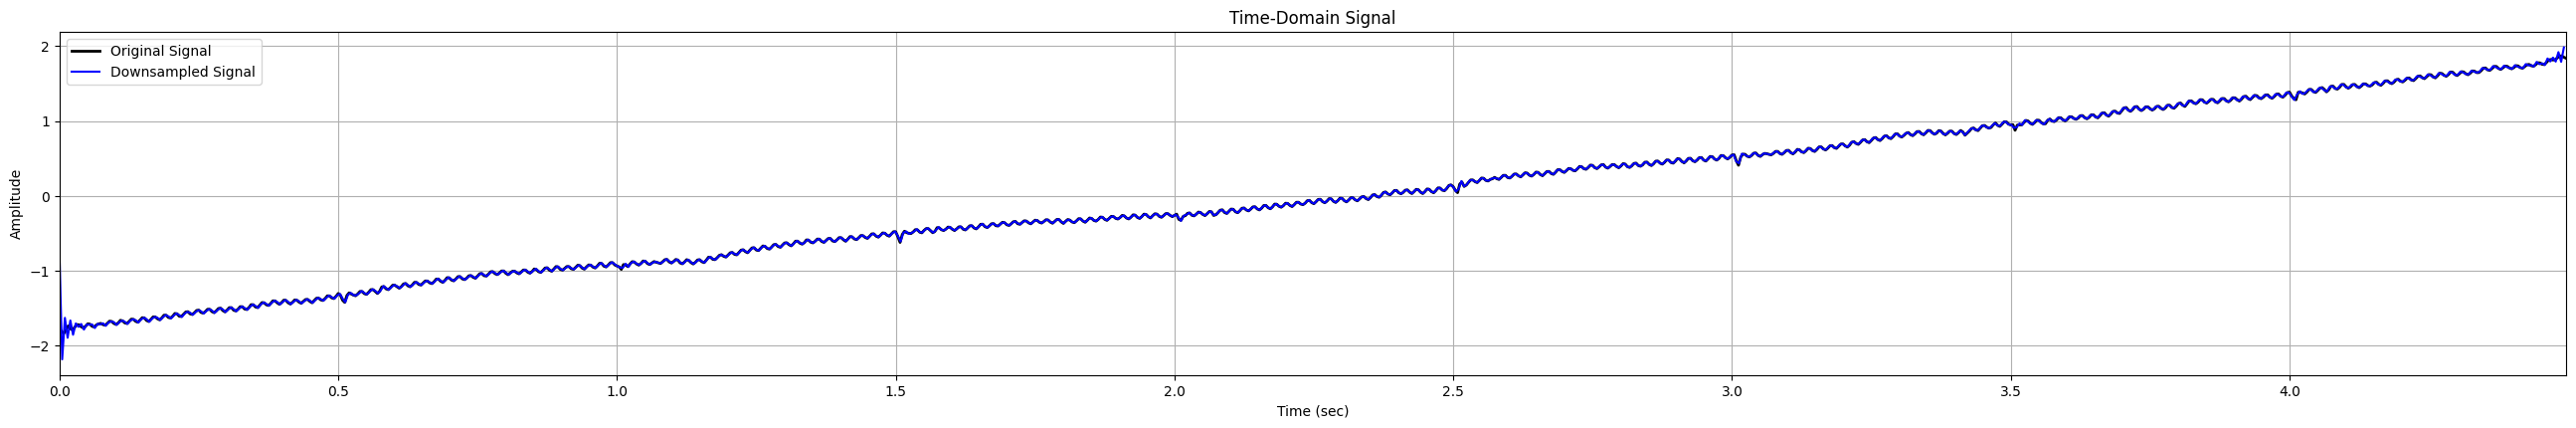

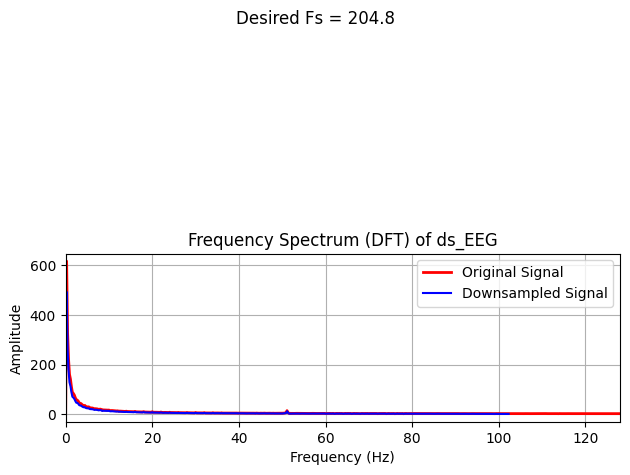

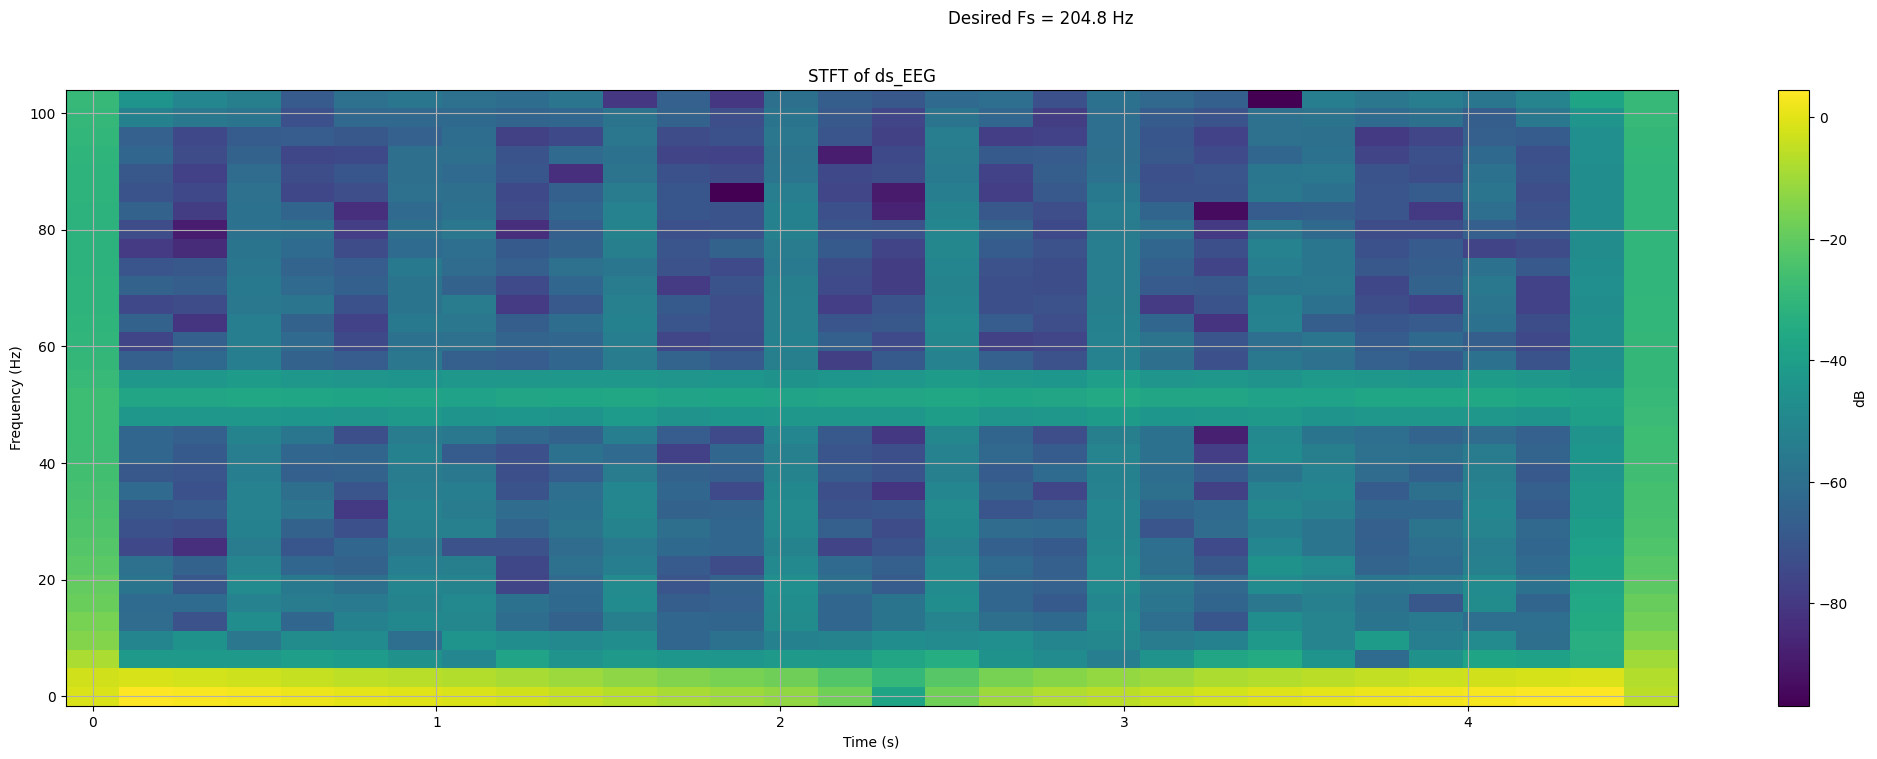

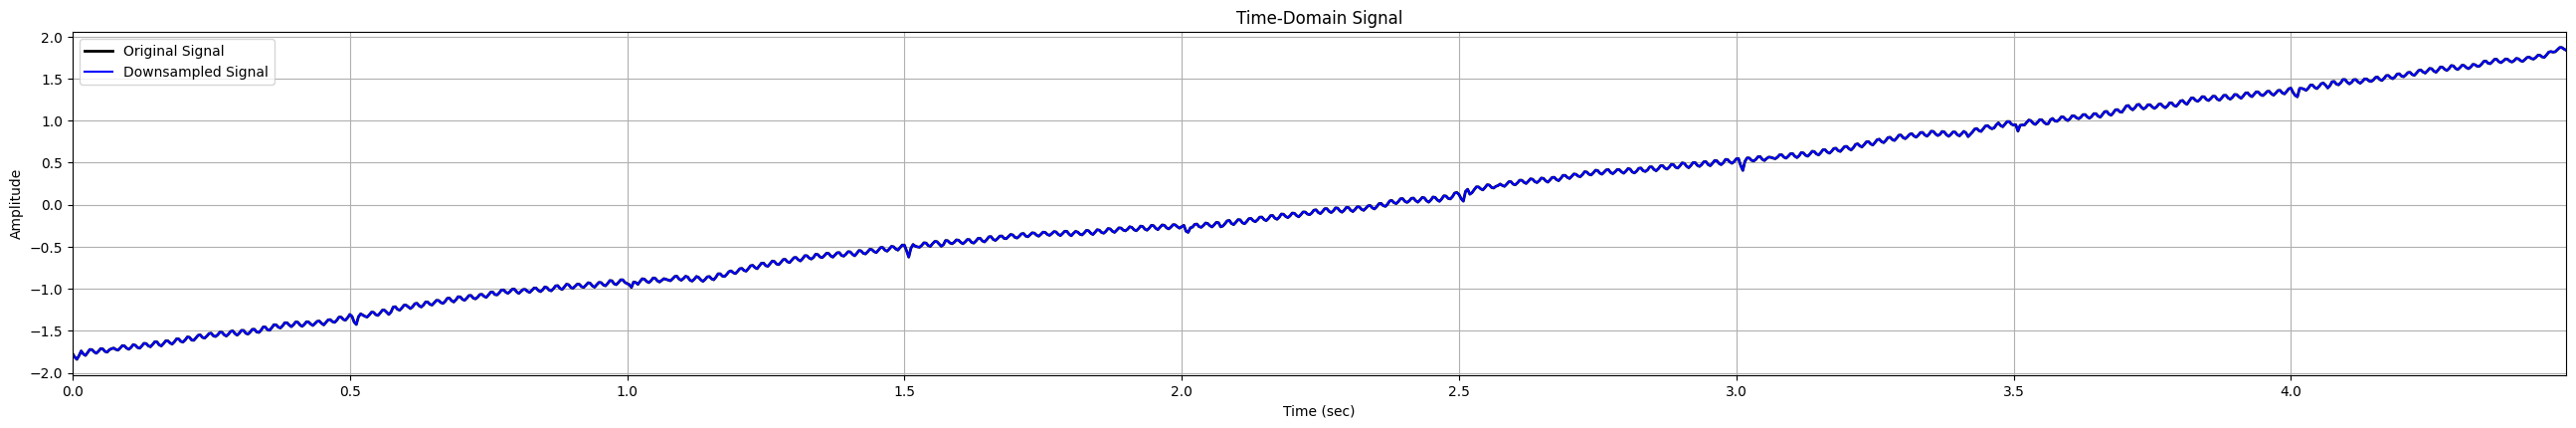

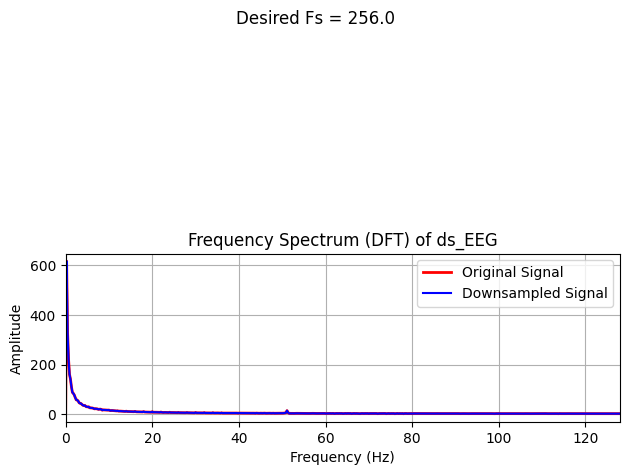

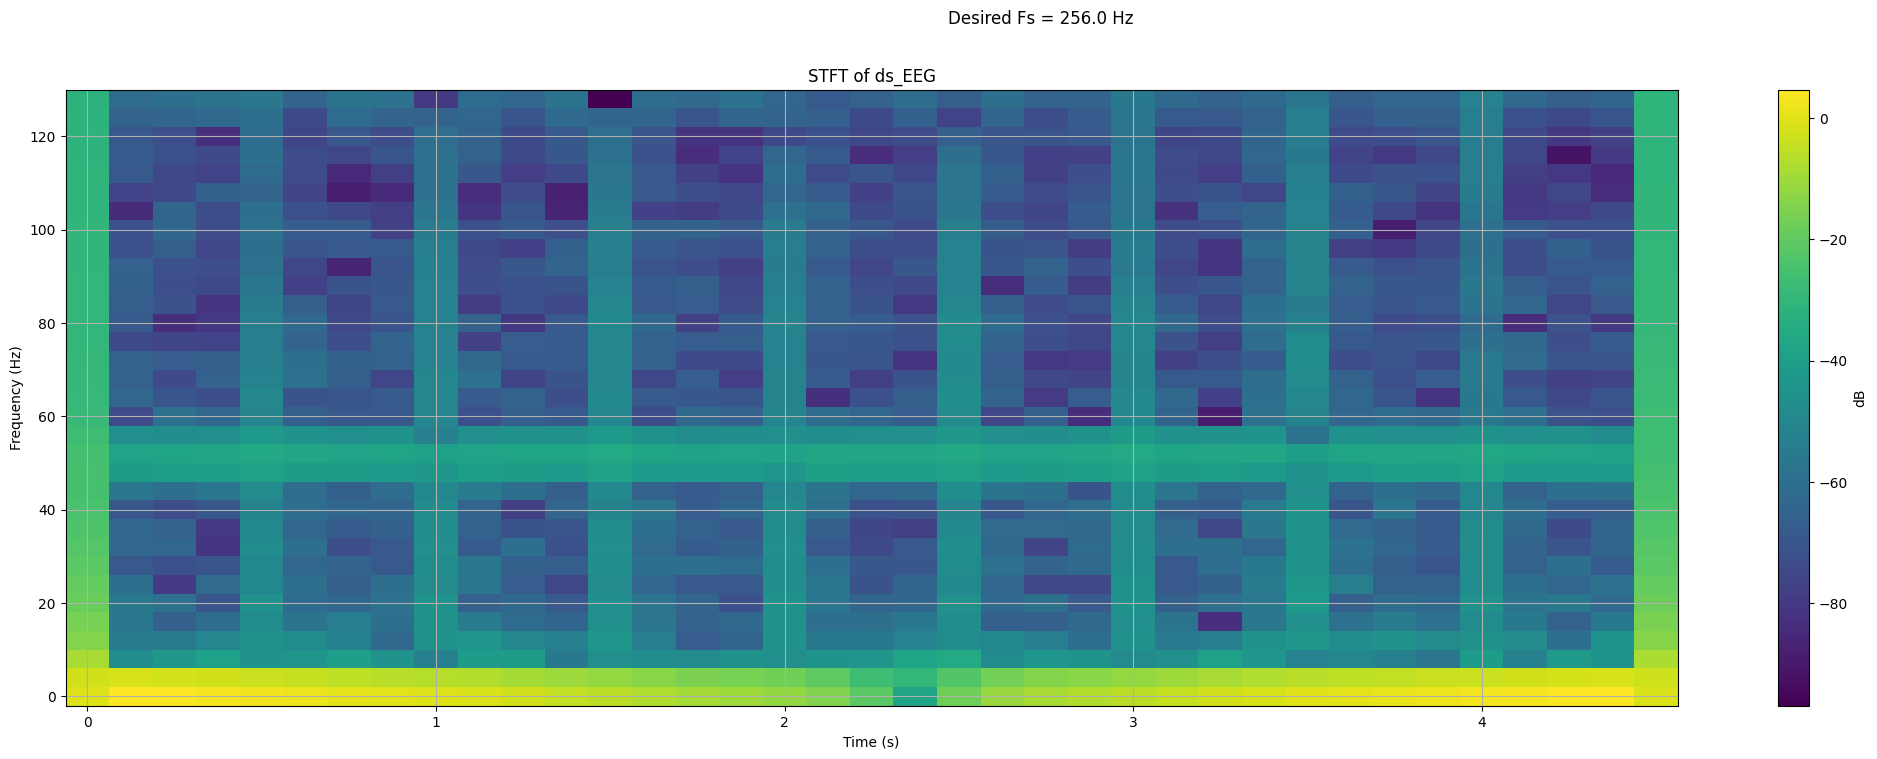

In [18]:
from scipy.signal import butter, lfilter, resample

M = [1, 2, 4, 6, 8, 10]
desireds_fs = np.array(M)*fs/10

for desired_fs in desireds_fs:
    # Define the desired lower sampling rate
    t = np.arange(0, len(signal)) / fs

    # Step 1: Apply a low-pass filter
    # Design a Butterworth low-pass filter
    nyquist = 0.5 * fs
    low_cutoff = 0.4999 * desired_fs
    b, a = butter(3, low_cutoff / nyquist, btype='low')

    # Apply the filter to the original signal
    filtered_signal = lfilter(b, a, signal)

    # Step 2: Downsample the filtered signal
    downsampled_signal = resample(filtered_signal, int(len(filtered_signal) * (desired_fs / fs)),)

    # Step 3: Plot the time signal, frequency spectrum (DFT), and STFT of the downsampled signal
    # Time signal
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal, 'k', label="Original Signal", lw=2)
    plt.plot(np.arange(0, len(downsampled_signal)) / desired_fs, downsampled_signal, c='b', label="Downsampled Signal")
    plt.title("Time-Domain Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.xlim(0, t[-1])
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Frequency Spectrum (DFT) of ds_EEG
    plt.subplot(2, 1, 2)
    dft = fft(signal.to_numpy())
    n = len(signal)
    freq = np.fft.fftfreq(n, 1/fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Original Signal", lw=2)
    dft_ds_EEG = fft(downsampled_signal)
    freq_ds_EEG = np.fft.fftfreq(len(downsampled_signal), 1 / desired_fs)
    positive_freq_indices = np.where(freq_ds_EEG >= 0)

    plt.plot(freq_ds_EEG[positive_freq_indices], np.abs(dft_ds_EEG[positive_freq_indices]), c='b', label="Downsampled Signal")
    plt.title("Frequency Spectrum (DFT) of ds_EEG")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.suptitle("Desired Fs = {}".format(desired_fs))
    plt.tight_layout()
    plt.legend()
    plt.xlim(0, fs/2)
    plt.show()

    # STFT of ds_EEG
    f_ds_EEG, t_ds_EEG, Zxx_ds_EEG = stft(downsampled_signal, fs=desired_fs, nperseg=64)
    plt.figure(figsize=(26, 8))
    plt.pcolormesh(t_ds_EEG, f_ds_EEG, 20 * np.log10(np.abs(Zxx_ds_EEG)))
    plt.title("STFT of ds_EEG")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="dB")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.show()

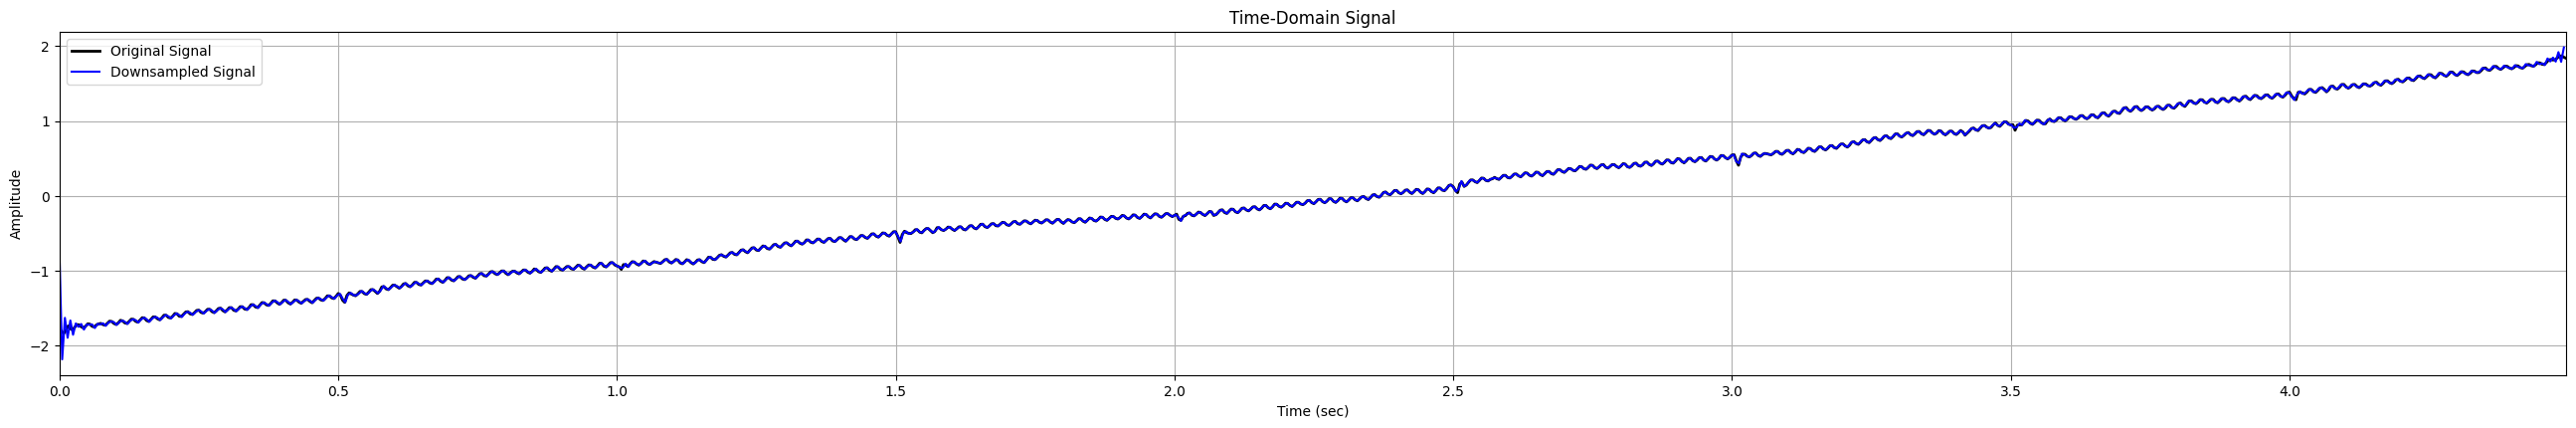

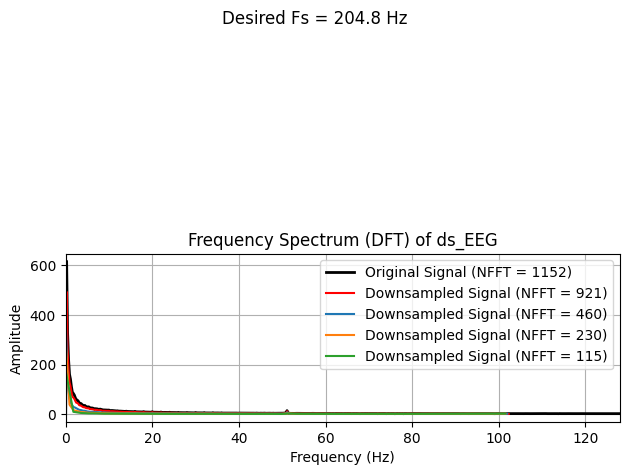

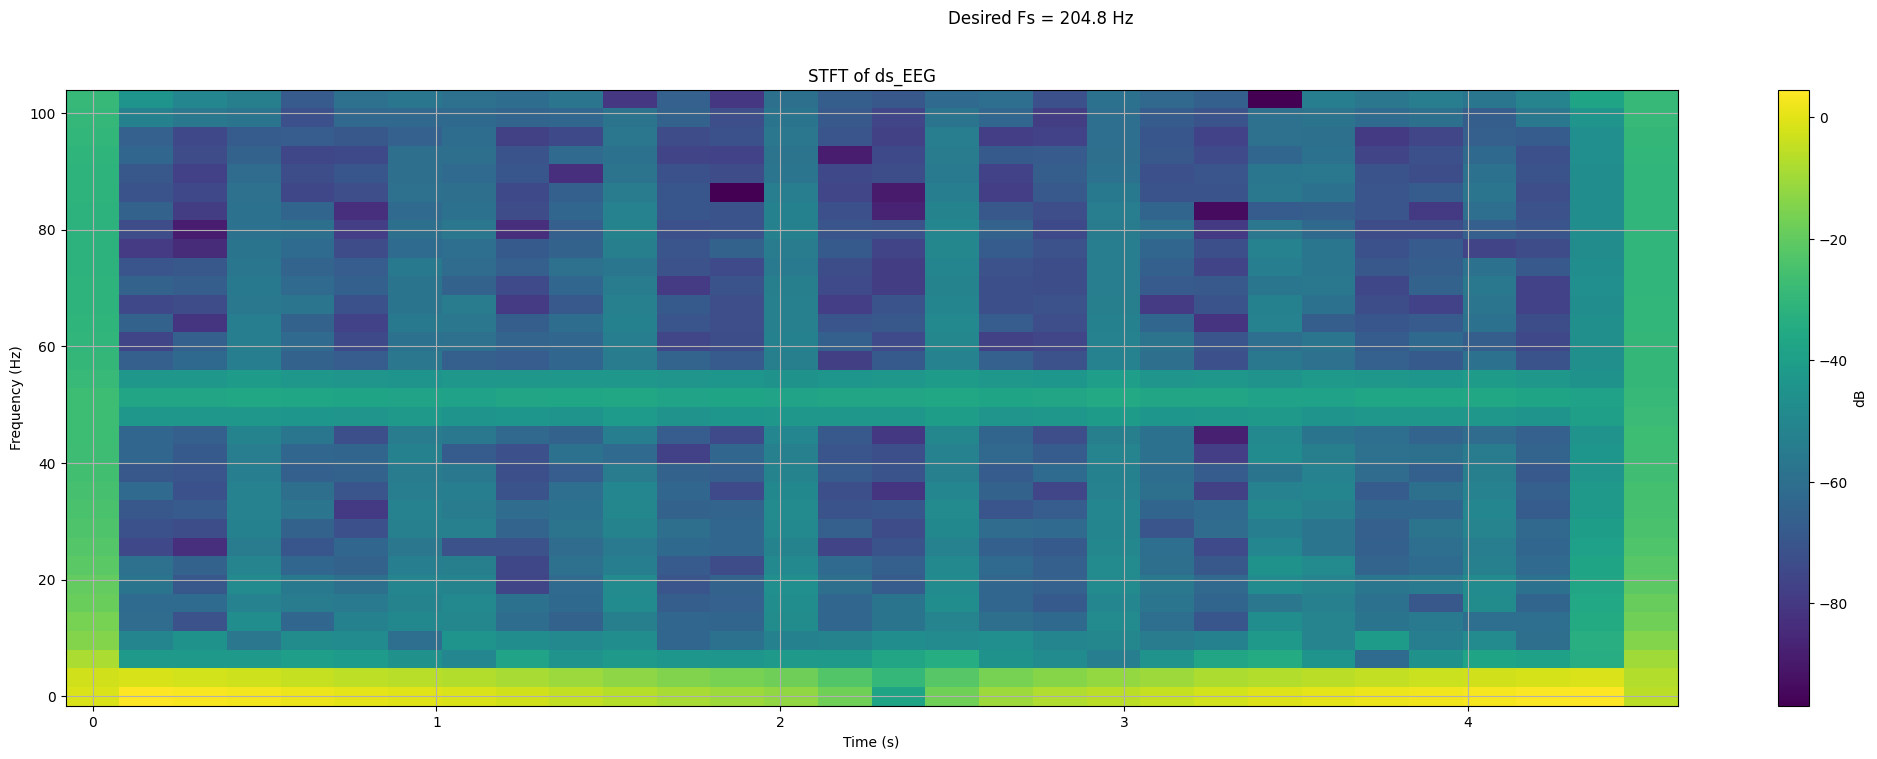

In [19]:
M = [8] # factor downsample
desireds_fs = np.array(M)*fs/10

for desired_fs in desireds_fs:
    # Define the desired lower sampling rate
    t = np.arange(0, len(signal)) / fs

    # Step 1: Apply a low-pass filter
    # Design a Butterworth low-pass filter
    nyquist = 0.5 * fs
    low_cutoff = 0.4999 * desired_fs
    b, a = butter(3, low_cutoff / nyquist, btype='low')

    # Apply the filter to the original signal
    filtered_signal = lfilter(b, a, signal)

    # Step 2: Downsample the filtered signal
    downsampled_signal = resample(filtered_signal, int(len(filtered_signal) * (desired_fs / fs)),)

    # Step 3: Plot the time signal, frequency spectrum (DFT), and STFT of the downsampled signal
    # Time signal
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal, 'k', label="Original Signal", lw=2)
    plt.plot(np.arange(0, len(downsampled_signal)) / desired_fs, downsampled_signal, c='b', label="Downsampled Signal")
    plt.title("Time-Domain Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.xlim(0, t[-1])
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Frequency Spectrum (DFT) of ds_EEG
    plt.subplot(2, 1, 2)

    dft = fft(signal.to_numpy())
    freq = np.fft.fftfreq(len(signal), 1/fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'k', label="Original Signal (NFFT = {})".format(len(signal)), lw=2)

    dft = fft(downsampled_signal)
    freq = np.fft.fftfreq(len(downsampled_signal), 1/desired_fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Downsampled Signal (NFFT = {})".format(len(downsampled_signal)), lw=1.5)

    NFFT0 = len(downsampled_signal)
    NFFTs = [NFFT0//2, NFFT0//4, NFFT0//8]

    for NFFT in NFFTs:
        dft_ds_EEG = fft(downsampled_signal, NFFT)
        freq_ds_EEG = np.fft.fftfreq(len(dft_ds_EEG), 1/desired_fs)
        positive_freq_indices = np.where(freq_ds_EEG >= 0)
        plt.plot(freq_ds_EEG[positive_freq_indices], np.abs(dft_ds_EEG[positive_freq_indices]), label="Downsampled Signal (NFFT = {})".format(NFFT))

    plt.title("Frequency Spectrum (DFT) of ds_EEG")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.tight_layout()
    plt.legend()
    plt.xlim(0, fs/2)
    plt.show()

    # STFT of ds_EEG
    f_ds_EEG, t_ds_EEG, Zxx_ds_EEG = stft(downsampled_signal, fs=desired_fs, nperseg=64)
    plt.figure(figsize=(26, 8))
    plt.pcolormesh(t_ds_EEG, f_ds_EEG, 20 * np.log10(np.abs(Zxx_ds_EEG)))
    plt.title("STFT of ds_EEG")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="dB")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.show()